<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#New-variables" data-toc-modified-id="New-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>New variables</a></span><ul class="toc-item"><li><span><a href="#food_supply_kg" data-toc-modified-id="food_supply_kg-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>food_supply_kg</a></span></li><li><span><a href="#ratio_kcalkg-and-protein_percentage" data-toc-modified-id="ratio_kcalkg-and-protein_percentage-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ratio_kcalkg and protein_percentage</a></span></li><li><span><a href="#dom_sup_kcal-and-dom_sup_kgprot" data-toc-modified-id="dom_sup_kcal-and-dom_sup_kgprot-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>dom_sup_kcal and dom_sup_kgprot</a></span></li><li><span><a href="#great_import_from_undern_countries" data-toc-modified-id="great_import_from_undern_countries-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>great_import_from_undern_countries</a></span></li></ul></li><li><span><a href="#Identify-major-trends" data-toc-modified-id="Identify-major-trends-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Identify major trends</a></span></li></ul></div>

<a id="Top"></a>

<hr style="border:1.5px solid black"> </hr>

<a id='Task_2'></a>

# Overview

- Identify the primary key of each table and test them.  
> <font color='blue'>The primary keys of both tables *'veg'* and *'ani'* are combinations of *'Area Code'* + *'Element Code'* + *'Item Code'* + *'Year'*.  A new column 'pimary_key' was created for each table composed of these 4 columns. I then tested the integrity of the primary keys by setting the column *'primary_key'* as the index of each table, then run verify_integrity. [Click to see code](#task_2_item_1)</font>

- Create a dataframe containing information about each country's population. Calculate the total number of humans on the planet.  
> <font color='blue'>A dataset was downloaded from FAO website under Annual population, which contains population numbers per country from year 1950 till 2018. I then selected data for the years 2014 and 2018 for this task. After that by using *.groupby* and *.sum()* I was able to calculate global population per each year. However, the result values were too high to match reality. Therefore I plotted the table to look at potential anomolies. Sure enough duplicated big values showed up on the graph. I then created a table of countries with population numbers over 1 billion. It turned out, mainland China's population is accounted for twice for each yearin this dataset. I then deleted duplicated values.Then re-calculated world population. Finally multiplying result numbers by 1000 as FAO population values are in unit of 1000 person.  [Click to see code](#task_2_item_2) </font>

- Among the documents on the Food Balance Sheets that you have downloaded, you will find redundant information concerning the 11 elements.  Identify these redundancies and give your answer as a mathematical formula. Have a look at the Food Balance Sheets then click on “definitions and standards”
    - The expected formula is a simple three term equation involving each of the 11 amounts seen above:  a1+a2+[...]=b1+[...]=c1+c2+[...] . For this equation, give the example of wheat in France.
    
> <font color='blue'>Looking at the elemant descriptions on Food Balance Sheet, I suspected that:<br>
>> - Domestic supply quantity = Food supply quantity + Feed + Seed + Losses + Processing + Other uses + Residuals<br>
also<br>
>> - Domestic supply quantity = Production + Import Quantity + Stock Variation - Export Quantity<br>
    
<font color='blue'>I created a subset of the table *food* containing only data of wheat in France. Then I performed some data cleaning on the subset to have a clear overview of the numbers of these elements. Finally I created two new columns using equitions mentioned above compare whether they are correct. In the end the results were satisfactory.[Click to see code](#task_2_item_3) </font>

<hr style="border:1.5px solid blalck"> </hr>

<font color='blue'>Importing necessary libraries.</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset of plant based food
veg_2014 = pd.read_csv("\\veg_2014.csv")
veg_2018 = pd.read_csv("\\veg_2018.csv")
veg = veg_2014.append(veg_2018)

In [5]:
veg.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2014-),2,Afghanistan,5511,Production,2511,Wheat and products,2014,2014,1000 tonnes,5370.0,Im,FAO data based on imputation methodology
1,FBS,Food Balances (2014-),2,Afghanistan,5611,Import Quantity,2511,Wheat and products,2014,2014,1000 tonnes,1466.0,Im,FAO data based on imputation methodology
2,FBS,Food Balances (2014-),2,Afghanistan,5072,Stock Variation,2511,Wheat and products,2014,2014,1000 tonnes,290.0,Im,FAO data based on imputation methodology
3,FBS,Food Balances (2014-),2,Afghanistan,5911,Export Quantity,2511,Wheat and products,2014,2014,1000 tonnes,0.0,Im,FAO data based on imputation methodology
4,FBS,Food Balances (2014-),2,Afghanistan,5301,Domestic supply quantity,2511,Wheat and products,2014,2014,1000 tonnes,6546.0,S,Standardized data


In [7]:
# Import dataset of animal based food
ani = pd.read_csv("\\ani.csv")
ani.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2014-),2,Afghanistan,5511,Production,2731,Bovine Meat,2014,2014,1000 tonnes,137.0,Im,FAO data based on imputation methodology
1,FBS,Food Balances (2014-),2,Afghanistan,5511,Production,2731,Bovine Meat,2018,2018,1000 tonnes,130.0,Im,FAO data based on imputation methodology
2,FBS,Food Balances (2014-),2,Afghanistan,5611,Import Quantity,2731,Bovine Meat,2014,2014,1000 tonnes,16.0,Im,FAO data based on imputation methodology
3,FBS,Food Balances (2014-),2,Afghanistan,5611,Import Quantity,2731,Bovine Meat,2018,2018,1000 tonnes,5.0,Im,FAO data based on imputation methodology
4,FBS,Food Balances (2014-),2,Afghanistan,5072,Stock Variation,2731,Bovine Meat,2014,2014,1000 tonnes,-8.0,Im,FAO data based on imputation methodology


<a id="task_2_item_1"></a>

<hr style="border:1px solid blalck"> </hr>

<font color='blue'>Creating a new column 'primary_key' for table *veg*. It is the combination of 'Area Code', Element Code', 'Item Code' and 'Year'.</font>

In [9]:
# Create primary key column
veg["primary_key"] = (
    veg["Area Code (FAO)"].astype(str)
    + veg["Element Code"].astype(str)
    + veg["Item Code"].astype(str)
    + veg["Year"].astype(str)
)
veg.set_index("primary_key", verify_integrity=True)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
primary_key,,,,,,,,,,,,,,
2551125112014,FBS,Food Balances (2014-),2,Afghanistan,5511,Production,2511,Wheat and products,2014,2014,1000 tonnes,5370.00,Im,FAO data based on imputation methodology
2561125112014,FBS,Food Balances (2014-),2,Afghanistan,5611,Import Quantity,2511,Wheat and products,2014,2014,1000 tonnes,1466.00,Im,FAO data based on imputation methodology
2507225112014,FBS,Food Balances (2014-),2,Afghanistan,5072,Stock Variation,2511,Wheat and products,2014,2014,1000 tonnes,290.00,Im,FAO data based on imputation methodology
2591125112014,FBS,Food Balances (2014-),2,Afghanistan,5911,Export Quantity,2511,Wheat and products,2014,2014,1000 tonnes,0.00,Im,FAO data based on imputation methodology
2530125112014,FBS,Food Balances (2014-),2,Afghanistan,5301,Domestic supply quantity,2511,Wheat and products,2014,2014,1000 tonnes,6546.00,S,Standardized data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181514228992018,FBS,Food Balances (2014-),181,Zimbabwe,5142,Food,2899,Miscellaneous,2018,2018,1000 tonnes,16.00,Im,FAO data based on imputation methodology
18164528992018,FBS,Food Balances (2014-),181,Zimbabwe,645,Food supply quantity (kg/capita/yr),2899,Miscellaneous,2018,2018,kg,1.08,Fc,Calculated data
18166428992018,FBS,Food Balances (2014-),181,Zimbabwe,664,Food supply (kcal/capita/day),2899,Miscellaneous,2018,2018,kcal/capita/day,1.00,Fc,Calculated data


In [10]:
# Create primary key column
ani["primary_key"] = (
    ani["Area Code (FAO)"].astype(str)
    + ani["Element Code"].astype(str)
    + ani["Item Code"].astype(str)
    + ani["Year"].astype(str)
)
ani.set_index("primary_key", verify_integrity=True)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
primary_key,,,,,,,,,,,,,,
2551127312014,FBS,Food Balances (2014-),2,Afghanistan,5511,Production,2731,Bovine Meat,2014,2014,1000 tonnes,137.0,Im,FAO data based on imputation methodology
2551127312018,FBS,Food Balances (2014-),2,Afghanistan,5511,Production,2731,Bovine Meat,2018,2018,1000 tonnes,130.0,Im,FAO data based on imputation methodology
2561127312014,FBS,Food Balances (2014-),2,Afghanistan,5611,Import Quantity,2731,Bovine Meat,2014,2014,1000 tonnes,16.0,Im,FAO data based on imputation methodology
2561127312018,FBS,Food Balances (2014-),2,Afghanistan,5611,Import Quantity,2731,Bovine Meat,2018,2018,1000 tonnes,5.0,Im,FAO data based on imputation methodology
2507227312014,FBS,Food Balances (2014-),2,Afghanistan,5072,Stock Variation,2731,Bovine Meat,2014,2014,1000 tonnes,-8.0,Im,FAO data based on imputation methodology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18166427752018,FBS,Food Balances (2014-),181,Zimbabwe,664,Food supply (kcal/capita/day),2775,Aquatic Plants,2018,2018,kcal/capita/day,0.0,Fc,Calculated data
18167427752014,FBS,Food Balances (2014-),181,Zimbabwe,674,Protein supply quantity (g/capita/day),2775,Aquatic Plants,2014,2014,g/capita/day,0.0,Fc,Calculated data
18167427752018,FBS,Food Balances (2014-),181,Zimbabwe,674,Protein supply quantity (g/capita/day),2775,Aquatic Plants,2018,2018,g/capita/day,0.0,Fc,Calculated data


<a id="task_2_item_2"></a>

<font color='blue'>Import dataset downloaded from FAO, containing total population number of each country from 1950 till 2018.</font>

In [11]:
population = pd.read_csv("\\population.csv")
population.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1950,1950,1000 persons,7752.118,X,International reliable sources,"UNDESA, Population Division – World Population..."
1,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1951,1951,1000 persons,7840.156,X,International reliable sources,NaN
2,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1952,1952,1000 persons,7935.997,X,International reliable sources,NaN
3,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1953,1953,1000 persons,8039.694,X,International reliable sources,NaN
4,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1954,1954,1000 persons,8151.317,X,International reliable sources,NaN


<font color='blue'> Selecting data for the years 2014 and 2018.</font>

In [12]:
population_20142018 = population[population["Year"].isin([2014, 2018])]

In [13]:
population_20142018

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
64,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2014,2014,1000 persons,33370.794,X,International reliable sources,NaN
68,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2018,2018,1000 persons,37171.921,X,International reliable sources,NaN
133,OA,Annual population,3,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2014,2014,1000 persons,2896.305,X,International reliable sources,NaN
137,OA,Annual population,3,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2018,2018,1000 persons,2882.740,X,International reliable sources,NaN
202,OA,Annual population,4,Algeria,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2014,2014,1000 persons,38923.692,X,International reliable sources,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14734,OA,Annual population,249,Yemen,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2018,2018,1000 persons,28498.683,X,International reliable sources,NaN
14841,OA,Annual population,251,Zambia,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2014,2014,1000 persons,15399.788,X,International reliable sources,NaN
14845,OA,Annual population,251,Zambia,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2018,2018,1000 persons,17351.708,X,International reliable sources,NaN
14910,OA,Annual population,181,Zimbabwe,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2014,2014,1000 persons,13586.707,X,International reliable sources,NaN


 <font color='blue'> Using *.groupby* and *.sum()* to calculate global population per year</font>

In [14]:
population_20142018.groupby("Year")["Value"].sum()

Year
2014    8726228.590
2018    9090746.135
Name: Value, dtype: float64

<font color='blue'>Hmm... result values seem too high to match reality. Checking value distribution through a graph </font>

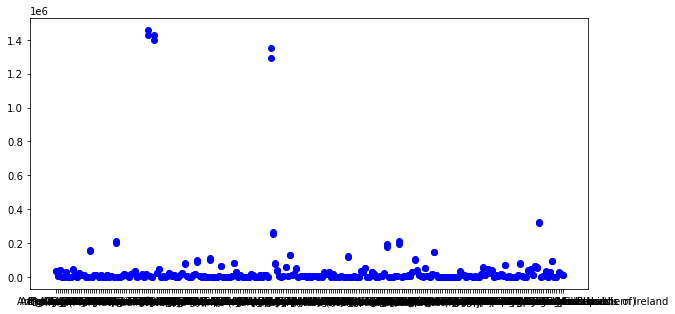

In [15]:
x = population_20142018["Area"]
y = population_20142018["Value"]
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color="blue")
plt.show()

<font color='blue'>Potential duplicated big values detected looking at the graph.<br> 
Creating a seperate table of countries with population over 1 billion</font>

In [16]:
pop_big = population_20142018[population_20142018["Value"] > 1000000]
pop_big

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
2802,OA,Annual population,351,China,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2014,2014,1000 persons,1430670.819,A,"Aggregate, may include official, semi-official...",NaN
2806,OA,Annual population,351,China,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2018,2018,1000 persons,1459377.612,A,"Aggregate, may include official, semi-official...",NaN
3009,OA,Annual population,41,"China, mainland",511,Total Population - Both sexes,3010,Population - Est. & Proj.,2014,2014,1000 persons,1399453.965,X,International reliable sources,NaN
3013,OA,Annual population,41,"China, mainland",511,Total Population - Both sexes,3010,Population - Est. & Proj.,2018,2018,1000 persons,1427647.786,X,International reliable sources,NaN
6505,OA,Annual population,100,India,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2014,2014,1000 persons,1295600.772,X,International reliable sources,NaN
6509,OA,Annual population,100,India,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2018,2018,1000 persons,1352642.280,X,International reliable sources,NaN


<font color='blue'>Mainland China's population is accounted for twice for each year since *'China'* and *'China mainland*' both show up in the result set.<br> 
    Deleting *'China'* population (Area Code *351*) as it contains already mainland population plus Hongkong, Macao and Taiwan population.</font>

In [17]:
population_20142018 = population_20142018[population_20142018["Area Code (FAO)"] != 351]

<font color='blue'>Re-calculating world population </font>

In [18]:
population_20142018.groupby("Year")["Value"].sum()

Year
2014    7295557.771
2018    7631368.523
Name: Value, dtype: float64

In [19]:
world_population_20142018 = (
    population_20142018.groupby("Year")["Value"].sum().to_frame()
)
world_population_20142018.reset_index(inplace=True)
world_population_20142018

,Year,Value
0,2014,7295557.771
1,2018,7631368.523


<font color='blue'>Multiplying result by 1000 as per FAO unit instruction </font>

In [20]:
world_population_20142018["Value"] = world_population_20142018["Value"] * 1000
world_population_20142018

,Year,Value
0,2014,7.295558e+09
1,2018,7.631369e+09


<font color='blue'>Creating variables for total world population for 2014 and 2018, for future use.</font>

In [21]:
world_population_total_2014 = world_population_20142018.iloc[0, 1]
world_population_total_2018 = world_population_20142018.iloc[1, 1]

In [23]:
world_population_total_2018

7631368523.000003

----

<font color='blue'> Identify relations between variables: Domestic supply quantity, Production, Import Quantity, Stock Variation and Export Quantity.</font>

In [24]:
ani.Element.value_counts()

Domestic supply quantity                  7565
Food                                      7562
Food supply quantity (kg/capita/yr)       7522
Food supply (kcal/capita/day)             7520
Fat supply quantity (g/capita/day)        7520
Protein supply quantity (g/capita/day)    7520
Import Quantity                           7415
Production                                6122
Export Quantity                           5865
Other uses (non-food)                     4849
Stock Variation                           4137
Residuals                                 3811
Losses                                    1493
Feed                                      1306
Processing                                1245
Tourist consumption                        867
Seed                                       414
Name: Element, dtype: int64

 <font color='blue'>Looking at the elemant description, in combination with definition description from FAO, I would suspect that:<br> 
    - Domestic supply quantity = Food supply quantity + Feed + Seed + Losses + Processing + Other uses + Residuals <br>
also<br>
    - Domestic supply quantity = Production + Import Quantity + Stock Variation - Export Quantity</font>

<font color='blue'> Let's verify above theory with an example: wheat (item code 2511) ~ France.</font>

In [25]:
veg.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,primary_key
0,FBS,Food Balances (2014-),2,Afghanistan,5511,Production,2511,Wheat and products,2014,2014,1000 tonnes,5370.0,Im,FAO data based on imputation methodology,2551125112014
1,FBS,Food Balances (2014-),2,Afghanistan,5611,Import Quantity,2511,Wheat and products,2014,2014,1000 tonnes,1466.0,Im,FAO data based on imputation methodology,2561125112014
2,FBS,Food Balances (2014-),2,Afghanistan,5072,Stock Variation,2511,Wheat and products,2014,2014,1000 tonnes,290.0,Im,FAO data based on imputation methodology,2507225112014
3,FBS,Food Balances (2014-),2,Afghanistan,5911,Export Quantity,2511,Wheat and products,2014,2014,1000 tonnes,0.0,Im,FAO data based on imputation methodology,2591125112014
4,FBS,Food Balances (2014-),2,Afghanistan,5301,Domestic supply quantity,2511,Wheat and products,2014,2014,1000 tonnes,6546.0,S,Standardized data,2530125112014


In [26]:
wheat_in_france = veg[(veg["Item Code"] == 2511) & (veg["Area"] == "France")]
wheat_in_france

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,primary_key
46283,FBS,Food Balances (2014-),68,France,5511,Production,2511,Wheat and products,2014,2014,1000 tonnes,38950.00,Im,FAO data based on imputation methodology,68551125112014
46284,FBS,Food Balances (2014-),68,France,5611,Import Quantity,2511,Wheat and products,2014,2014,1000 tonnes,2395.00,Im,FAO data based on imputation methodology,68561125112014
46285,FBS,Food Balances (2014-),68,France,5072,Stock Variation,2511,Wheat and products,2014,2014,1000 tonnes,-129.00,Im,FAO data based on imputation methodology,68507225112014
46286,FBS,Food Balances (2014-),68,France,5911,Export Quantity,2511,Wheat and products,2014,2014,1000 tonnes,22226.00,Im,FAO data based on imputation methodology,68591125112014
46287,FBS,Food Balances (2014-),68,France,5301,Domestic supply quantity,2511,Wheat and products,2014,2014,1000 tonnes,19247.00,S,Standardized data,68530125112014
46288,FBS,Food Balances (2014-),68,France,5521,Feed,2511,Wheat and products,2014,2014,1000 tonnes,7367.00,Im,FAO data based on imputation methodology,68552125112014
46289,FBS,Food Balances (2014-),68,France,5527,Seed,2511,Wheat and products,2014,2014,1000 tonnes,770.00,Im,FAO data based on imputation methodology,68552725112014
46290,FBS,Food Balances (2014-),68,France,5123,Losses,2511,Wheat and products,2014,2014,1000 tonnes,359.00,Im,FAO data based on imputation methodology,68512325112014
46291,FBS,Food Balances (2014-),68,France,5131,Processing,2511,Wheat and products,2014,2014,1000 tonnes,1958.00,Im,FAO data based on imputation methodology,68513125112014
46292,FBS,Food Balances (2014-),68,France,5154,Other uses (non-food),2511,Wheat and products,2014,2014,1000 tonnes,1142.00,Im,FAO data based on imputation methodology,68515425112014


In [27]:
wheat_in_france = wheat_in_france.pivot_table(
    index=("Year"), columns="Element", values="Value", aggfunc="sum"
)
wheat_in_france

Element,Domestic supply quantity,Export Quantity,Fat supply quantity (g/capita/day),Feed,Food,Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Import Quantity,Losses,Other uses (non-food),Processing,Production,Protein supply quantity (g/capita/day),Residuals,Seed,Stock Variation
Year,,,,,,,,,,,,,,,,
2014,19247.0,22226.0,4.29,7367.0,7651.0,867.0,115.78,2395.0,359.0,1142.0,1958.0,38950.0,27.83,0.0,770.0,-129.0
2018,19521.0,20446.0,4.10,7599.0,7779.0,871.0,116.22,2349.0,326.0,1149.0,1960.0,35798.0,28.01,0.0,708.0,-1819.0


<font color='blue'>Selecting relavent columns from *wheat_in_france* to make calculation easier to read. </font>

In [28]:
wheat_in_france = wheat_in_france[
    [
        "Domestic supply quantity",
        "Export Quantity",
        "Import Quantity",
        "Feed",
        "Food",
        "Losses",
        "Other uses (non-food)",
        "Processing",
        "Production",
        "Residuals",
        "Seed",
        "Stock Variation",
    ]
]
wheat_in_france

Element,Domestic supply quantity,Export Quantity,Import Quantity,Feed,Food,Losses,Other uses (non-food),Processing,Production,Residuals,Seed,Stock Variation
Year,,,,,,,,,,,,
2014,19247.0,22226.0,2395.0,7367.0,7651.0,359.0,1142.0,1958.0,38950.0,0.0,770.0,-129.0
2018,19521.0,20446.0,2349.0,7599.0,7779.0,326.0,1149.0,1960.0,35798.0,0.0,708.0,-1819.0


<font color='blue'>Verifying if the following equation is true:<br>
Domestic supply quantity = Food supply quantity + Feed + Seed + Losses + Processing + Other uses + Residuals</font>

In [29]:
wheat_in_france["compare"] = (
    wheat_in_france["Food"]
    + wheat_in_france["Feed"]
    + wheat_in_france["Seed"]
    + wheat_in_france["Losses"]
    + wheat_in_france["Processing"]
    + wheat_in_france["Residuals"]
    + wheat_in_france["Other uses (non-food)"]
)
wheat_in_france

<ipython-input-29-18f8ffc8c259>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wheat_in_france["compare"] = (


Element,Domestic supply quantity,Export Quantity,Import Quantity,Feed,Food,Losses,Other uses (non-food),Processing,Production,Residuals,Seed,Stock Variation,compare
Year,,,,,,,,,,,,,
2014,19247.0,22226.0,2395.0,7367.0,7651.0,359.0,1142.0,1958.0,38950.0,0.0,770.0,-129.0,19247.0
2018,19521.0,20446.0,2349.0,7599.0,7779.0,326.0,1149.0,1960.0,35798.0,0.0,708.0,-1819.0,19521.0


<font color='blue'>Equation checks out.</font>

<font color='blue'>
Verifying if the second equation is true:<br>
Domestic supply quantity = Production + Import Quantity + Stock Variation - Export Quantity </font>

In [30]:
wheat_in_france["compare"] = (
    wheat_in_france["Production"]
    + wheat_in_france["Import Quantity"]
    + wheat_in_france["Stock Variation"].abs()
    - wheat_in_france["Export Quantity"]
)
wheat_in_france

<ipython-input-30-fff264a8c685>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wheat_in_france["compare"] = (


Element,Domestic supply quantity,Export Quantity,Import Quantity,Feed,Food,Losses,Other uses (non-food),Processing,Production,Residuals,Seed,Stock Variation,compare
Year,,,,,,,,,,,,,
2014,19247.0,22226.0,2395.0,7367.0,7651.0,359.0,1142.0,1958.0,38950.0,0.0,770.0,-129.0,19248.0
2018,19521.0,20446.0,2349.0,7599.0,7779.0,326.0,1149.0,1960.0,35798.0,0.0,708.0,-1819.0,19520.0


<font color='blue'> Result values in column 'compare' are slightly different from 'Domestic supply quantity', but within acceptable range. This might be a mathematical discrepancy. </font>

<a id='Task_3'></a>

# Data Cleaning
<font color='blue'>Add variable ‘origin’ to tables *veg* and *ani*. Appends *veg* and *ani* to one table *temp*. Renaming of *temp* s columns with Laura's guideline in mind. Transformation of *temp* to a pivot table so that the elements are now columns of the new table. Renaming columns according to Laura's guideline: lower-case, no spaces (use underscore instead), no special characters, no accented characters.
Index columns need to be normal columns. Rename table *food*. <br>
From now on, table *food* will be the main table I work with.[Click to see code](#task_3)</font>

In [31]:
# Add variable ‘origin’
ani["origin"] = "animal"
veg["origin"] = "vegetal"

In [32]:
ani.head(3)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,primary_key,origin
0,FBS,Food Balances (2014-),2,Afghanistan,5511,Production,2731,Bovine Meat,2014,2014,1000 tonnes,137.0,Im,FAO data based on imputation methodology,2551127312014,animal
1,FBS,Food Balances (2014-),2,Afghanistan,5511,Production,2731,Bovine Meat,2018,2018,1000 tonnes,130.0,Im,FAO data based on imputation methodology,2551127312018,animal
2,FBS,Food Balances (2014-),2,Afghanistan,5611,Import Quantity,2731,Bovine Meat,2014,2014,1000 tonnes,16.0,Im,FAO data based on imputation methodology,2561127312014,animal


In [33]:
veg.head(3)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,primary_key,origin
0,FBS,Food Balances (2014-),2,Afghanistan,5511,Production,2511,Wheat and products,2014,2014,1000 tonnes,5370.0,Im,FAO data based on imputation methodology,2551125112014,vegetal
1,FBS,Food Balances (2014-),2,Afghanistan,5611,Import Quantity,2511,Wheat and products,2014,2014,1000 tonnes,1466.0,Im,FAO data based on imputation methodology,2561125112014,vegetal
2,FBS,Food Balances (2014-),2,Afghanistan,5072,Stock Variation,2511,Wheat and products,2014,2014,1000 tonnes,290.0,Im,FAO data based on imputation methodology,2507225112014,vegetal


 <font color='blue'>Appends veg and ani to one table </font>

In [34]:
temp = ani.append(veg)
temp.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,primary_key,origin
0,FBS,Food Balances (2014-),2,Afghanistan,5511,Production,2731,Bovine Meat,2014,2014,1000 tonnes,137.0,Im,FAO data based on imputation methodology,2551127312014,animal
1,FBS,Food Balances (2014-),2,Afghanistan,5511,Production,2731,Bovine Meat,2018,2018,1000 tonnes,130.0,Im,FAO data based on imputation methodology,2551127312018,animal
2,FBS,Food Balances (2014-),2,Afghanistan,5611,Import Quantity,2731,Bovine Meat,2014,2014,1000 tonnes,16.0,Im,FAO data based on imputation methodology,2561127312014,animal
3,FBS,Food Balances (2014-),2,Afghanistan,5611,Import Quantity,2731,Bovine Meat,2018,2018,1000 tonnes,5.0,Im,FAO data based on imputation methodology,2561127312018,animal
4,FBS,Food Balances (2014-),2,Afghanistan,5072,Stock Variation,2731,Bovine Meat,2014,2014,1000 tonnes,-8.0,Im,FAO data based on imputation methodology,2507227312014,animal


In [35]:
temp.columns

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'primary_key', 'origin'],
      dtype='object')

In [36]:
temp.columns = [
    "xx",
    "xx2",
    "country_code",
    "country",
    "xx3",
    "element",
    "item_code",
    "item",
    "xx4",
    "year",
    "unit",
    "value",
    "xx5",
    "xx6",
    "primary_key",
    "origin",
]

<font color='blue'>Transformation of ‘temp’ to a pivot table </font>

In [37]:
data = temp.pivot_table(
    index=["country_code", "country", "item_code", "item", "year", "origin"],
    columns=["element"],
    values=["value"],
    aggfunc=sum,
)
data.head()

value  \
element                                                         Domestic supply quantity   
country_code country item_code item                year origin                             
1            Armenia 2511      Wheat and products  2014 vegetal                    639.0   
                                                   2018 vegetal                    571.0   
                     2513      Barley and products 2014 vegetal                    196.0   
                                                   2018 vegetal                    141.0   
                     2514      Maize and products  2014 vegetal                     39.0   

                                                                                 \
element                                                         Export Quantity   
country_code country item_code item                year origin                    
1            Armenia 2511      Wheat and products  2014 vegetal             1.0   
                                                   2018 vegetal             1.0   
                     2513      Barley and products 2014 vegetal             0.0   
                                                   2018 vegetal             NaN   
                     2514      Maize and products  2014 vegetal             NaN   

                                                                                                    \
element                                                         Fat supply quantity (g/capita/day)   
country_code country item_code item                year origin                                       
1            Armenia 2511      Wheat and products  2014 vegetal                               3.90   
                                                   2018 vegetal                               4.40   
                     2513      Barley and products 2014 vegetal                               0.04   
                                                   2018 vegetal                               0.03   
                     2514      Maize and products  2014 vegetal                               0.00   

                                                                               \
element                                                           Feed   Food   
country_code country item_code item                year origin                  
1            Armenia 2511      Wheat and products  2014 vegetal  110.0  406.0   
                                                   2018 vegetal  118.0  428.0   
                     2513      Barley and products 2014 vegetal  152.0    3.0   
                                                   2018 vegetal   94.0    2.0   
                     2514      Maize and products  2014 vegetal   33.0    0.0   

                                                                                               \
element                                                         Food supply (kcal/capita/day)   
country_code country item_code item                year origin                                  
1            Armenia 2511      Wheat and products  2014 vegetal                        1107.0   
                                                   2018 vegetal                        1151.0   
                     2513      Barley and products 2014 vegetal                           8.0   
                                                   2018 vegetal                           6.0   
                     2514      Maize and products  2014 vegetal                           0.0   

                                                                                                     \
element                                                         Food supply quantity (kg/capita/yr)   
country_code country item_code item                year origin                                        
1            Armenia 2511      Wheat and products  2014 vegetal                              139.33   
                          

<font color='blue'>Renaming of data’s columns according to Laura's guideline:<br>
*lower-case, no spaces (use underscore instead), no special characters, no accented characters*.</font>

In [38]:
data.columns

MultiIndex([('value',               'Domestic supply quantity'),
            ('value',                        'Export Quantity'),
            ('value',     'Fat supply quantity (g/capita/day)'),
            ('value',                                   'Feed'),
            ('value',                                   'Food'),
            ('value',          'Food supply (kcal/capita/day)'),
            ('value',    'Food supply quantity (kg/capita/yr)'),
            ('value',                        'Import Quantity'),
            ('value',                                 'Losses'),
            ('value',                  'Other uses (non-food)'),
            ('value',                             'Processing'),
            ('value',                             'Production'),
            ('value', 'Protein supply quantity (g/capita/day)'),
            ('value',                              'Residuals'),
            ('value',                                   'Seed'),
            ('value',    

In [39]:
data.columns = [
    "domestic_supply_quantity",
    "export_quantity",
    "fat_supply_quantity_gcapitaday",
    "feed",
    "food",
    "food_supply_kcalcapitaday",
    "food_supply_quantity_kgcapitayr",
    "import_quantity",
    "losses",
    "other_uses",
    "processing",
    "production",
    "protein_supply_quantity_gcapitaday",
    "residuals",
    "seed",
    "stock_variation",
    "tourist_consumption",
]

In [40]:
data.head(3)

domestic_supply_quantity  \
country_code country item_code item                year origin                              
1            Armenia 2511      Wheat and products  2014 vegetal                     639.0   
                                                   2018 vegetal                     571.0   
                     2513      Barley and products 2014 vegetal                     196.0   

                                                                 export_quantity  \
country_code country item_code item                year origin                     
1            Armenia 2511      Wheat and products  2014 vegetal              1.0   
                                                   2018 vegetal              1.0   
                     2513      Barley and products 2014 vegetal              0.0   

                                                                 fat_supply_quantity_gcapitaday  \
country_code country item_code item                year origin                                    
1            Armenia 2511      Wheat and products  2014 vegetal                            3.90   
                                                   2018 vegetal                            4.40   
                     2513      Barley and products 2014 vegetal                            0.04   

                                                                  feed   food  \
country_code country item_code item                year origin                  
1            Armenia 2511      Wheat and products  2014 vegetal  110.0  406.0   
                                                   2018 vegetal  118.0  428.0   
                     2513      Barley and products 2014 vegetal  152.0    3.0   

                                                                 food_supply_kcalcapitaday  \
country_code country item_code item                year origin                               
1            Armenia 2511      Wheat and products  2014 vegetal                     1107.0   
                                                   2018 vegetal                     1151.0   
                     2513      Barley and products 2014 vegetal                        8.0   

                                                                 food_supply_quantity_kgcapitayr  \
country_code country item_code item                year origin                                     
1            Armenia 2511      Wheat and products  2014 vegetal                           139.33   
                                                   2018 vegetal                           144.90   
                     2513      Barley and products 2014 vegetal                             0.97   

                                                                 import_quantity  \
country_code country item_code item                year origin                     
1            Armenia 2511      Wheat and products  2014 vegetal            344.0   
                                                   2018 vegetal            379.0   
                     2513      Barley and products 2014 vegetal              6.0   

                                                                 losses  \
country_code country item_code item                year origin            
1            Armenia 2511      Wheat and products  2014 vegetal    30.0   
                                                   2018 vegetal    16.0   
                     2513      Barley and products 2014 vegetal    16.0   

                                                                 other_uses  \
country_code country item_code item                year origin                
1            Armenia 2511      Wheat and products  2014 vegetal         0.0   
                                                   2018 vegetal         0.0   
                     2513      Barley and products 2014 vegetal         5.0   

                                                                 processing  \
country_code country item_code i

<font color='blue'>Index columns need to be normal columns</font>

In [41]:
food = data.reset_index()
food

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,fat_supply_quantity_gcapitaday,feed,...,import_quantity,losses,other_uses,processing,production,protein_supply_quantity_gcapitaday,residuals,seed,stock_variation,tourist_consumption
0,1,Armenia,2511,Wheat and products,2014,vegetal,639.0,1.0,3.90,110.0,...,344.0,30.0,0.0,16.0,338.0,33.01,46.0,32.0,42.0,NaN
1,1,Armenia,2511,Wheat and products,2018,vegetal,571.0,1.0,4.40,118.0,...,379.0,16.0,0.0,16.0,187.0,34.25,-27.0,20.0,-5.0,NaN
2,1,Armenia,2513,Barley and products,2014,vegetal,196.0,0.0,0.04,152.0,...,6.0,16.0,5.0,6.0,190.0,0.28,0.0,15.0,0.0,NaN
3,1,Armenia,2513,Barley and products,2018,vegetal,141.0,NaN,0.03,94.0,...,17.0,11.0,19.0,5.0,124.0,0.20,0.0,10.0,0.0,NaN
4,1,Armenia,2514,Maize and products,2014,vegetal,39.0,NaN,0.00,33.0,...,52.0,7.0,NaN,0.0,20.0,0.00,0.0,0.0,33.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32594,351,China,2807,Rice and products,2018,vegetal,206919.0,3178.0,2.81,15159.0,...,5221.0,8624.0,2703.0,924.0,214079.0,14.80,0.0,6875.0,9202.0,9.0
32595,351,China,2848,Milk - Excluding Butter,2014,animal,43203.0,58.0,3.21,271.0,...,995.0,2006.0,1.0,2415.0,42265.0,3.05,0.0,NaN,-1.0,9.0
32596,351,China,2848,Milk - Excluding Butter,2018,animal,37076.0,96.0,2.84,265.0,...,1577.0,1063.0,1.0,1982.0,35600.0,2.72,0.0,NaN,6.0,8.0
32597,351,China,2899,Miscellaneous,2014,vegetal,-1063.0,1748.0,0.00,NaN,...,690.0,NaN,0.0,NaN,NaN,0.01,-1292.0,NaN,4.0,5.0


<hr style="border:1px solid blalck"> </hr>

# New variables 
<font color='blue'>

Before starting working on adding variables, I dropped unecessary columns to make further work easier.<br>
- Add variables : food_supply_kcal & food_supply_kgprotein<br>
Using table *population_20142018* (from task 2), inserted total global population data into table *food*. <br>
food_supply_kcal = food_supply_kcalcapitaday * population * 365<br>
food_supply_kgprotein = protein_supply_quantity_gcapitaday / 1000 * population * 365<br>
    

- Add variable : food_supply_kg<br>
Definition: food supply expressed in kg<br>
food_supply_kg = food * 1000000 <br>

- Add variables : ratio_kcalkg and protein_percentage<br>
Definition: "energy:weight" ratio of each item expressed in kcal/kg and the protein percentage of each item.<br>
ratio_kcalkg = food_supply_kcal / food_supply_kg<br>
protein_percentage = food_supply_kgprotein / food_supply_kg<br>

- Add variables: dom_sup_kcal and dom_sup_kgprot<br>
Definition: Global domestic supply in kcal, and global domestic supply in kg of protein<br>
dom_sup_kcal = domestic_supply_quantity * 1000000 * ratio_kcalkg<br>
dom_sup_kgprot = domestic_supply_quantity * 1000000 * protein_percentage<br>

- Add variables: great_import_from_undern_countries<br>
Definition: (A boolean variable) true or false - do the 200 highest imports of the 25 most exported items come from countries with more than 10% malnourishment?<br>

</font>

<hr style="border:1px solid blalck"> </hr>

food supply expressed in kcal and food supply expressed in kg of protein.
Use the following information:
- Each country’s population
- food_supply_kcalcapitaday
- protein_supply_quantity_gcapitaday


In [45]:
population_20142018_pivot = population_20142018.pivot_table(
    index=(["Area Code (FAO)", "Area", "Year"]), columns="Element", values="Value"
)
population_20142018_to_be_merged = population_20142018_pivot.reset_index()
population_20142018_to_be_merged

Element,Area Code (FAO),Area,Year,Total Population - Both sexes
0,1,Armenia,2014,2912.409
1,1,Armenia,2018,2951.745
2,2,Afghanistan,2014,33370.794
3,2,Afghanistan,2018,37171.921
4,3,Albania,2014,2896.305
...,...,...,...,...
467,281,Saint-Martin (French part),2018,37.264
468,282,Saint Barthélemy,2014,9.623
469,282,Saint Barthélemy,2018,9.816
470,299,Palestine,2014,4428.639


<font color='blue'>Renaming *population_20142018* columns to match main table *food*, in anticipation for merging. Also multiplying *'population'* values by 1000 (the FAO data unit for population) to represent accurate number.</font>

In [46]:
population_20142018_to_be_merged.columns = [
    "country_code",
    "country",
    "year",
    "population",
]

population_20142018_to_be_merged["population"] = (
    population_20142018_to_be_merged["population"] * 1000
)

population_20142018_to_be_merged

,country_code,country,year,population
0,1,Armenia,2014,2912409.0
1,1,Armenia,2018,2951745.0
2,2,Afghanistan,2014,33370794.0
3,2,Afghanistan,2018,37171921.0
4,3,Albania,2014,2896305.0
...,...,...,...,...
467,281,Saint-Martin (French part),2018,37264.0
468,282,Saint Barthélemy,2014,9623.0
469,282,Saint Barthélemy,2018,9816.0
470,299,Palestine,2014,4428639.0


In [47]:
food = pd.merge(
    food,
    population_20142018_to_be_merged,
    on=["country_code", "country", "year"],
    how="inner",
)

food

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,...,import_quantity,losses,other_uses,processing,production,protein_supply_quantity_gcapitaday,residuals,seed,stock_variation,population
0,1,Armenia,2511,Wheat and products,2014,vegetal,639.0,1.0,110.0,406.0,...,344.0,30.0,0.0,16.0,338.0,33.01,46.0,32.0,42.0,2912409.0
1,1,Armenia,2513,Barley and products,2014,vegetal,196.0,0.0,152.0,3.0,...,6.0,16.0,5.0,6.0,190.0,0.28,0.0,15.0,0.0,2912409.0
2,1,Armenia,2514,Maize and products,2014,vegetal,39.0,NaN,33.0,0.0,...,52.0,7.0,NaN,0.0,20.0,0.00,0.0,0.0,33.0,2912409.0
3,1,Armenia,2515,Rye and products,2014,vegetal,0.0,NaN,0.0,0.0,...,0.0,0.0,NaN,0.0,1.0,0.03,0.0,0.0,1.0,2912409.0
4,1,Armenia,2516,Oats,2014,vegetal,8.0,NaN,6.0,1.0,...,1.0,0.0,NaN,NaN,7.0,0.19,0.0,1.0,-1.0,2912409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32400,276,Sudan,2781,"Fish, Body Oil",2018,animal,0.0,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,0.00,NaN,NaN,NaN,41801533.0
32401,276,Sudan,2782,"Fish, Liver Oil",2018,animal,0.0,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,0.00,NaN,NaN,NaN,41801533.0
32402,276,Sudan,2807,Rice and products,2018,vegetal,125.0,5.0,0.0,122.0,...,119.0,2.0,NaN,NaN,30.0,0.36,0.0,1.0,19.0,41801533.0
32403,276,Sudan,2848,Milk - Excluding Butter,2018,animal,4625.0,0.0,285.0,3871.0,...,23.0,466.0,0.0,4.0,4591.0,9.96,0.0,NaN,-11.0,41801533.0


In [48]:
# food_supply_kcal = food_supply_kcalcapitaday * population * 365
food["food_supply_kcal"] = food["food_supply_kcalcapitaday"] * food["population"] * 365

In [49]:
# food_supply_kgprotein = protein_supply_quantity_gcapitaday / 1000 * population * 365
food["food_supply_kgprotein"] = (
    food["protein_supply_quantity_gcapitaday"] / 1000 * food["population"] * 365
)

<a id="task_4_item_2"></a>

In [50]:
food[["country", "year", "food_supply_kcal", "food_supply_kgprotein"]].head()

,country,year,food_supply_kcal,food_supply_kgprotein
0,Armenia,2014,1.176773e+12,3.509060e+07
1,Armenia,2014,8.504234e+09,2.976482e+05
2,Armenia,2014,0.000000e+00,0.000000e+00
3,Armenia,2014,1.063029e+09,3.189088e+04
4,Armenia,2014,5.315146e+09,2.019756e+05


<hr style="border:1px solid blalck"> </hr>

## food_supply_kg
Definition: food supply expressed in kg

In [51]:
food["food_supply_kg"] = food["food"] * 1000000

In [52]:
food[["country", "year", "food_supply_kg"]].head()

,country,year,food_supply_kg
0,Armenia,2014,406000000.0
1,Armenia,2014,3000000.0
2,Armenia,2014,0.0
3,Armenia,2014,0.0
4,Armenia,2014,1000000.0


<a id='task_4_item_3'></a>

## ratio_kcalkg and protein_percentage

<font color='blue'>ratio_kcalkg = food_supply_kcal / food_supply_kg </font>

In [53]:
food["ratio_kcalkg"] = food["food_supply_kcal"] / food["food_supply_kg"]

<font color='blue'>protein_percentage = food_supply_kgprotein / food_supply_kg </font>

In [54]:
food["protein_percentage"] = food["food_supply_kgprotein"] / food["food_supply_kg"]

In [55]:
food[["country", "year", "ratio_kcalkg", "protein_percentage"]].head()

,country,year,ratio_kcalkg,protein_percentage
0,Armenia,2014,2898.456696,0.086430
1,Armenia,2014,2834.744760,0.099216
2,Armenia,2014,NaN,NaN
3,Armenia,2014,inf,inf
4,Armenia,2014,5315.146425,0.201976


<hr style="border:1px solid blalck"> </hr>

## dom_sup_kcal and dom_sup_kgprot
dom_sup_kcal = domestic_supply_quantity * 1000000 * ratio_kcalkg <br>
dom_sup_kgprot = domestic_supply_quantity * 1000000 * protein_percentage

In [56]:
food["dom_sup_kcal"] = food["domestic_supply_quantity"] * 1000000 * food["ratio_kcalkg"]
food["dom_sup_kgprot"] = (
    food["domestic_supply_quantity"] * 1000000 * food["protein_percentage"]
)

In [58]:
food[["country", "year", "dom_sup_kcal", "dom_sup_kgprot"]].head()

,country,year,dom_sup_kcal,dom_sup_kgprot
0,Armenia,2014,1.852114e+12,5.522880e+07
1,Armenia,2014,5.556100e+11,1.944635e+07
2,Armenia,2014,NaN,NaN
3,Armenia,2014,NaN,NaN
4,Armenia,2014,4.252117e+10,1.615805e+06


<hr style="border:1px solid blalck"> </hr>

## great_import_from_undern_countries
A boolean variable - do the 200 highest imports of the 25 most
exported items come from countries with more than 10% malnourishment?

<font color='blue'>Import food security indicator dataset downloaded from FAO website. </font>

In [59]:
food_secu = pd.read_csv("\\food_security_indicators.csv")
food_secu.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20132015,2013-2015,%,24.2,F,FAO estimate,NaN
1,FS,Suite of Food Security Indicators,2,Afghanistan,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20172019,2017-2019,%,23.4,F,FAO estimate,NaN
2,FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20132015,2013-2015,millions,8.1,F,FAO estimate,NaN
3,FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-y...,20172019,2017-2019,millions,8.7,F,FAO estimate,NaN
4,FS,Suite of Food Security Indicators,3,Albania,6121,Value,210041,Prevalence of undernourishment (percent) (3-ye...,20132015,2013-2015,%,4.4,F,FAO estimate,NaN


In [60]:
food_secu = food_secu[
    ["Area Code (FAO)", "Area", "Item Code", "Item", "Year", "Unit", "Value"]
]

In [61]:
# Replacing string values in column Year with integer values for future aggregate operations.
food_secu["Year"].value_counts()

2017-2019    408
2013-2015    408
Name: Year, dtype: int64

In [62]:
food_secu["Year"] = food_secu["Year"].replace(
    ["2017-2019", "2013-2015"], ["2018", "2014"]
)

In [63]:
# Renaming columns to match column names of table food.
food_secu.columns = [
    "country_code",
    "country",
    "item_code",
    "item",
    "year",
    "unit",
    "value",
]

In [64]:
food_secu.head()

,country_code,country,item_code,item,year,unit,value
0,2,Afghanistan,210041,Prevalence of undernourishment (percent) (3-ye...,2014,%,24.2
1,2,Afghanistan,210041,Prevalence of undernourishment (percent) (3-ye...,2018,%,23.4
2,2,Afghanistan,210011,Number of people undernourished (million) (3-y...,2014,millions,8.1
3,2,Afghanistan,210011,Number of people undernourished (million) (3-y...,2018,millions,8.7
4,3,Albania,210041,Prevalence of undernourishment (percent) (3-ye...,2014,%,4.4


<font color='blue'>Pivot table so that values in column *'item'* becomes the new columns, in line with the format of table *food*.</font>

In [65]:
food_secu_pivot = food_secu.pivot(
    index=["country_code", "country", "year"], values=["value", "unit"], columns="item"
)
food_secu_pivot.head()

value  \
item                          Number of people undernourished (million) (3-year average)   
country_code country     year                                                              
1            Armenia     2014                                               <0.1           
                         2018                                               <0.1           
2            Afghanistan 2014                                                8.1           
                         2018                                                8.7           
3            Albania     2014                                                0.1           

                                                                                         \
item                          Prevalence of undernourishment (percent) (3-year average)   
country_code country     year                                                             
1            Armenia     2014                                                2.9          
                         2018                                                3.2          
2            Afghanistan 2014                                               24.2          
                         2018                                               23.4          
3            Albania     2014                                                4.4          

                                                                                    unit  \
item                          Number of people undernourished (million) (3-year average)   
country_code country     year                                                              
1            Armenia     2014                                           millions           
                         2018                                           millions           
2            Afghanistan 2014                                           millions           
                         2018                                           millions           
3            Albania     2014                                           millions           

                                                                                         
item                          Prevalence of undernourishment (percent) (3-year average)  
country_code country     year                                                            
1            Armenia     2014                                                  %         
                         2018                                                  %         
2            Afghanistan 2014                                                  %         
                         2018                                                  %         
3            Albania     2014                                                  %

In [66]:
food_secu_pivot.columns = food_secu_pivot.columns.droplevel(0)
food_secu_pivot.head()

item                          Number of people undernourished (million) (3-year average)  \
country_code country     year                                                              
1            Armenia     2014                                               <0.1           
                         2018                                               <0.1           
2            Afghanistan 2014                                                8.1           
                         2018                                                8.7           
3            Albania     2014                                                0.1           

item                          Prevalence of undernourishment (percent) (3-year average)  \
country_code country     year                                                             
1            Armenia     2014                                                2.9          
                         2018                                                3.2          
2            Afghanistan 2014                                               24.2          
                         2018                                               23.4          
3            Albania     2014                                                4.4          

item                          Number of people undernourished (million) (3-year average)  \
country_code country     year                                                              
1            Armenia     2014                                           millions           
                         2018                                           millions           
2            Afghanistan 2014                                           millions           
                         2018                                           millions           
3            Albania     2014                                           millions           

item                          Prevalence of undernourishment (percent) (3-year average)  
country_code country     year                                                            
1            Armenia     2014                                                  %         
                         2018                                                  %         
2            Afghanistan 2014                                                  %         
                         2018                                                  %         
3            Albania     2014                                                  %

In [67]:
food_secu_subset = food_secu_pivot.reset_index()

In [68]:
food_secu_subset.head()

item,country_code,country,year,Number of people undernourished (million) (3-year average),Prevalence of undernourishment (percent) (3-year average),Number of people undernourished (million) (3-year average),Prevalence of undernourishment (percent) (3-year average)
0,1,Armenia,2014,<0.1,2.9,millions,%
1,1,Armenia,2018,<0.1,3.2,millions,%
2,2,Afghanistan,2014,8.1,24.2,millions,%
3,2,Afghanistan,2018,8.7,23.4,millions,%
4,3,Albania,2014,0.1,4.4,millions,%


In [69]:
food_secu_subset.columns = [
    "country_code",
    "country",
    "year",
    "undernourish_million",
    "undernourish_percent",
    "col1",
    "col2",
]

In [70]:
food_secu_subset.drop(columns=["col1", "col2"], axis=1, inplace=True)

In [71]:
food_secu_subset.head()

,country_code,country,year,undernourish_million,undernourish_percent
0,1,Armenia,2014,<0.1,2.9
1,1,Armenia,2018,<0.1,3.2
2,2,Afghanistan,2014,8.1,24.2
3,2,Afghanistan,2018,8.7,23.4
4,3,Albania,2014,0.1,4.4


 <font color='blue'>Inserting undernourish data into table *food*.</font>

In [72]:
food["country_code"] = food["country_code"].astype(str)
food["year"] = food["year"].astype(str)
food_secu_subset["country_code"] = food_secu_subset["country_code"].astype(str)
food_secu_subset["year"] = food_secu_subset["year"].astype(str)
food = pd.merge(
    food, food_secu_subset, on=["country", "country_code", "year"], how="inner"
)

In [73]:
food.head()

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,...,population,food_supply_kcal,food_supply_kgprotein,food_supply_kg,ratio_kcalkg,protein_percentage,dom_sup_kcal,dom_sup_kgprot,undernourish_million,undernourish_percent
0,1,Armenia,2511,Wheat and products,2014,vegetal,639.0,1.0,110.0,406.0,...,2912409.0,1.176773e+12,3.509060e+07,406000000.0,2898.456696,0.086430,1.852114e+12,5.522880e+07,<0.1,2.9
1,1,Armenia,2513,Barley and products,2014,vegetal,196.0,0.0,152.0,3.0,...,2912409.0,8.504234e+09,2.976482e+05,3000000.0,2834.744760,0.099216,5.556100e+11,1.944635e+07,<0.1,2.9
2,1,Armenia,2514,Maize and products,2014,vegetal,39.0,NaN,33.0,0.0,...,2912409.0,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,<0.1,2.9
3,1,Armenia,2515,Rye and products,2014,vegetal,0.0,NaN,0.0,0.0,...,2912409.0,1.063029e+09,3.189088e+04,0.0,inf,inf,NaN,NaN,<0.1,2.9
4,1,Armenia,2516,Oats,2014,vegetal,8.0,NaN,6.0,1.0,...,2912409.0,5.315146e+09,2.019756e+05,1000000.0,5315.146425,0.201976,4.252117e+10,1.615805e+06,<0.1,2.9


<font color='blue'>Identify countries with undernourishement of 10%.</font>

In [74]:
food["undernourish_percent"] = food["undernourish_percent"].replace("<2.5", "2.0")

In [75]:
food["undernourish_percent"] = food["undernourish_percent"].astype(float)

In [76]:
undernourish_country = food[food["undernourish_percent"] > 10]

In [77]:
undernourish_country.head()

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,...,population,food_supply_kcal,food_supply_kgprotein,food_supply_kg,ratio_kcalkg,protein_percentage,dom_sup_kcal,dom_sup_kgprot,undernourish_million,undernourish_percent
183,2,Afghanistan,2511,Wheat and products,2014,vegetal,6546.0,0.0,44.0,5350.0,...,33370794.0,1.672361e+13,4.494545e+08,5.350000e+09,3125.907768,0.084010,2.046219e+13,5.499307e+08,8.1,24.2
184,2,Afghanistan,2513,Barley and products,2014,vegetal,507.0,0.0,360.0,55.0,...,33370794.0,1.827051e+11,5.481153e+06,5.500000e+07,3321.910857,0.099657,1.684209e+12,5.052626e+07,8.1,24.2
185,2,Afghanistan,2514,Maize and products,2014,vegetal,370.0,2.0,200.0,89.0,...,33370794.0,2.679675e+11,7.186400e+06,8.900000e+07,3010.870515,0.080746,1.114022e+12,2.987605e+07,8.1,24.2
186,2,Afghanistan,2515,Rye and products,2014,vegetal,0.0,0.0,0.0,0.0,...,33370794.0,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,8.1,24.2
187,2,Afghanistan,2516,Oats,2014,vegetal,0.0,0.0,0.0,0.0,...,33370794.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,8.1,24.2


<font color='blue'>Identify contries with most undernourishment percentage...</font>

In [78]:
undernourish_country = undernourish_country.sort_values(
    by="undernourish_percent", ascending=False
)

undernourish_country.country.unique()

array(['Central African Republic', 'Haiti', 'Yemen', 'Madagascar',
       "Democratic People's Republic of Korea", 'Liberia', 'Iraq',
       'Congo', 'Rwanda', 'Mozambique', 'Chad', 'Botswana', 'Timor-Leste',
       'Sierra Leone', 'United Republic of Tanzania', 'Papua New Guinea',
       'Kenya', 'Afghanistan', 'Namibia',
       'Venezuela (Bolivarian Republic of)', 'Togo', 'Lesotho',
       'Solomon Islands', 'Nicaragua', "Côte d'Ivoire", 'Djibouti',
       'Ethiopia', 'Guatemala', 'Malawi', 'Cabo Verde', 'Gabon', 'Angola',
       'Bolivia (Plurinational State of)', 'India', 'Honduras',
       'Bangladesh', 'Pakistan', 'Philippines', 'Eswatini',
       'Burkina Faso', 'Sao Tome and Principe', 'Gambia', 'Sudan',
       'Mongolia', 'Ecuador', 'Senegal', 'Nigeria', 'El Salvador'],
      dtype=object)

<font color='blue'>Groupby table *undernourish_country* by year/item, then sort by export_quantity to identify top 25 most exported items.</font>

In [79]:
top_25_export_by_undernourished_countries = (
    undernourish_country.groupby(["item_code", "item", "year"])["export_quantity"]
    .sum()
    .sort_values(ascending=False)
    .to_frame()
)
top_25_export_by_undernourished_countries

export_quantity
item_code item                         year                 
2807      Rice and products            2018          23435.0
                                       2014          22683.0
2615      Bananas                      2018          10498.0
2542      Sugar (Raw Equivalent)       2014           8387.0
                                       2018           8098.0
...                                                      ...
2563      Olives (including preserved) 2014              0.0
2541      Sugar non-centrifugal        2018              0.0
                                       2014              0.0
2537      Sugar beet                   2018              0.0
2580      Olive Oil                    2014              0.0

[194 rows x 1 columns]

In [80]:
top_25_export_by_undernourished_countries.reset_index(inplace=True)
top_25_export_by_undernourished_countries

,item_code,item,year,export_quantity
0,2807,Rice and products,2018,23435.0
1,2807,Rice and products,2014,22683.0
2,2615,Bananas,2018,10498.0
3,2542,Sugar (Raw Equivalent),2014,8387.0
4,2542,Sugar (Raw Equivalent),2018,8098.0
...,...,...,...,...
189,2563,Olives (including preserved),2014,0.0
190,2541,Sugar non-centrifugal,2018,0.0
191,2541,Sugar non-centrifugal,2014,0.0
192,2537,Sugar beet,2018,0.0


<font color='blue'>Identify the top 25 most exported items by undernourished countries in year 2014.</font>

In [81]:
top_25_export_by_undernourished_countries_2014 = top_25_export_by_undernourished_countries[
    top_25_export_by_undernourished_countries["year"] == "2014"
]
top_25_export_by_undernourished_countries_2014 = top_25_export_by_undernourished_countries_2014.sort_values(
    by="export_quantity", ascending=False
).head(
    25
)
top_25_export_by_undernourished_countries_2014

,item_code,item,year,export_quantity
1,2807,Rice and products,2014,22683.00
3,2542,Sugar (Raw Equivalent),2014,8387.00
5,2615,Bananas,2014,6606.00
6,2511,Wheat and products,2014,5976.00
7,2514,Maize and products,2014,4766.00
9,2605,"Vegetables, Other",2014,3152.00
15,2618,Pineapples and products,2014,2085.00
17,2577,Palm Oil,2014,1791.00
19,2625,"Fruits, Other",2014,1769.00
20,2731,Bovine Meat,2014,1724.00


<font color='blue'>Identify the top 25 most exported items by undernourished countries in year 2018.</font>

In [82]:
top_25_export_by_undernourished_countries_2018 = top_25_export_by_undernourished_countries[
    top_25_export_by_undernourished_countries["year"] == "2018"
]
top_25_export_by_undernourished_countries_2018 = top_25_export_by_undernourished_countries_2018.sort_values(
    by="export_quantity", ascending=False
).head(
    25
)
top_25_export_by_undernourished_countries_2018

,item_code,item,year,export_quantity
0,2807,Rice and products,2018,23435.00
2,2615,Bananas,2018,10498.00
4,2542,Sugar (Raw Equivalent),2018,8098.00
8,2511,Wheat and products,2018,3438.00
10,2605,"Vegetables, Other",2018,3038.00
11,2577,Palm Oil,2018,2565.00
12,2633,Cocoa Beans and products,2018,2482.00
13,2514,Maize and products,2018,2145.00
14,2602,Onions,2018,2091.00
16,2763,Pelagic Fish,2018,1970.45


<font color='blue'>From table *food*, selecting the 200 highest import quantities among these 25 items.</font>

In [83]:
food_subset2 = food[
    food["item_code"].isin(top_25_export_by_undernourished_countries["item_code"])
]

In [84]:
food_subset2

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,...,population,food_supply_kcal,food_supply_kgprotein,food_supply_kg,ratio_kcalkg,protein_percentage,dom_sup_kcal,dom_sup_kgprot,undernourish_million,undernourish_percent
0,1,Armenia,2511,Wheat and products,2014,vegetal,639.0,1.0,110.0,406.0,...,2912409.0,1.176773e+12,3.509060e+07,4.060000e+08,2898.456696,0.086430,1.852114e+12,5.522880e+07,<0.1,2.9
1,1,Armenia,2513,Barley and products,2014,vegetal,196.0,0.0,152.0,3.0,...,2912409.0,8.504234e+09,2.976482e+05,3.000000e+06,2834.744760,0.099216,5.556100e+11,1.944635e+07,<0.1,2.9
2,1,Armenia,2514,Maize and products,2014,vegetal,39.0,NaN,33.0,0.0,...,2912409.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,<0.1,2.9
3,1,Armenia,2515,Rye and products,2014,vegetal,0.0,NaN,0.0,0.0,...,2912409.0,1.063029e+09,3.189088e+04,0.000000e+00,inf,inf,NaN,NaN,<0.1,2.9
4,1,Armenia,2516,Oats,2014,vegetal,8.0,NaN,6.0,1.0,...,2912409.0,5.315146e+09,2.019756e+05,1.000000e+06,5315.146425,0.201976,4.252117e+10,1.615805e+06,<0.1,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32400,276,Sudan,2781,"Fish, Body Oil",2018,animal,0.0,NaN,NaN,0.0,...,41801533.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,5,12.0
32401,276,Sudan,2782,"Fish, Liver Oil",2018,animal,0.0,NaN,NaN,0.0,...,41801533.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,5,12.0
32402,276,Sudan,2807,Rice and products,2018,vegetal,125.0,5.0,0.0,122.0,...,41801533.0,2.898936e+11,5.492721e+06,1.220000e+08,2376.177306,0.045022,2.970222e+11,5.627788e+06,5,12.0
32403,276,Sudan,2848,Milk - Excluding Butter,2018,animal,4625.0,0.0,285.0,3871.0,...,41801533.0,3.127800e+12,1.519653e+08,3.871000e+09,808.008191,0.039257,3.737038e+12,1.815654e+08,5,12.0


In [85]:
top_200_import = (
    food_subset2.groupby(["country", "year"], as_index=False)
    .import_quantity.sum()
    .sort_values(by="import_quantity", ascending=False)
    .head(200)
)

In [86]:
top_200_import

,country,year,import_quantity
67,"China, mainland",2018,185903.08
66,"China, mainland",2014,166504.75
333,United States of America,2018,85731.78
332,United States of America,2014,78536.08
123,Germany,2018,65207.21
...,...,...,...
139,Haiti,2018,1665.92
191,Madagascar,2018,1606.39
323,Uganda,2018,1602.43
307,Tajikistan,2018,1587.18


<font color='blue'>For the 200 corresponding lines in table *food*, set “True” for the variable, and “False” for the other lines.</font>

In [87]:
food["great_import_from_undern_countries"] = np.where(
    food.index.isin(top_200_import.index), True, False
)

In [88]:
food.head()

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,...,food_supply_kcal,food_supply_kgprotein,food_supply_kg,ratio_kcalkg,protein_percentage,dom_sup_kcal,dom_sup_kgprot,undernourish_million,undernourish_percent,great_import_from_undern_countries
0,1,Armenia,2511,Wheat and products,2014,vegetal,639.0,1.0,110.0,406.0,...,1.176773e+12,3.509060e+07,406000000.0,2898.456696,0.086430,1.852114e+12,5.522880e+07,<0.1,2.9,True
1,1,Armenia,2513,Barley and products,2014,vegetal,196.0,0.0,152.0,3.0,...,8.504234e+09,2.976482e+05,3000000.0,2834.744760,0.099216,5.556100e+11,1.944635e+07,<0.1,2.9,True
2,1,Armenia,2514,Maize and products,2014,vegetal,39.0,NaN,33.0,0.0,...,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,<0.1,2.9,False
3,1,Armenia,2515,Rye and products,2014,vegetal,0.0,NaN,0.0,0.0,...,1.063029e+09,3.189088e+04,0.0,inf,inf,NaN,NaN,<0.1,2.9,False
4,1,Armenia,2516,Oats,2014,vegetal,8.0,NaN,6.0,1.0,...,5.315146e+09,2.019756e+05,1000000.0,5315.146425,0.201976,4.252117e+10,1.615805e+06,<0.1,2.9,True


In [89]:
food["great_import_from_undern_countries"].value_counts()

False    32205
True       200
Name: great_import_from_undern_countries, dtype: int64

[Back to task overview](#Task_4) <br>
[Back to top](#Top)

<hr style="border:1.5px solid blalck"> </hr>

<a id="Task_5"></a>

# Identify major trends 

Question: considering only plant products, what proportion of the global domestic supply is used as :<br>
food<br>
feed<br>
losses<br>
other uses<br>

<font color='blue'> Creating a subset of dataframe *food* that contain only plant products.</font>

In [90]:
food_plant = food[food["origin"] == "vegetal"]

In [91]:
food_plant

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,...,food_supply_kcal,food_supply_kgprotein,food_supply_kg,ratio_kcalkg,protein_percentage,dom_sup_kcal,dom_sup_kgprot,undernourish_million,undernourish_percent,great_import_from_undern_countries
0,1,Armenia,2511,Wheat and products,2014,vegetal,639.0,1.0,110.0,406.0,...,1.176773e+12,3.509060e+07,406000000.0,2898.456696,0.086430,1.852114e+12,5.522880e+07,<0.1,2.9,True
1,1,Armenia,2513,Barley and products,2014,vegetal,196.0,0.0,152.0,3.0,...,8.504234e+09,2.976482e+05,3000000.0,2834.744760,0.099216,5.556100e+11,1.944635e+07,<0.1,2.9,True
2,1,Armenia,2514,Maize and products,2014,vegetal,39.0,NaN,33.0,0.0,...,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,<0.1,2.9,False
3,1,Armenia,2515,Rye and products,2014,vegetal,0.0,NaN,0.0,0.0,...,1.063029e+09,3.189088e+04,0.0,inf,inf,NaN,NaN,<0.1,2.9,False
4,1,Armenia,2516,Oats,2014,vegetal,8.0,NaN,6.0,1.0,...,5.315146e+09,2.019756e+05,1000000.0,5315.146425,0.201976,4.252117e+10,1.615805e+06,<0.1,2.9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32379,276,Sudan,2659,"Alcohol, Non-Food",2018,vegetal,8.0,13.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,12.0,False
32380,276,Sudan,2680,Infant food,2018,vegetal,0.0,0.0,NaN,0.0,...,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,5,12.0,False
32391,276,Sudan,2745,Honey,2018,vegetal,1.0,0.0,NaN,1.0,...,0.000000e+00,0.000000e+00,1000000.0,0.000000,0.000000,0.000000e+00,0.000000e+00,5,12.0,False
32402,276,Sudan,2807,Rice and products,2018,vegetal,125.0,5.0,0.0,122.0,...,2.898936e+11,5.492721e+06,122000000.0,2376.177306,0.045022,2.970222e+11,5.627788e+06,5,12.0,False


<font color='blue'>Keeping only relevant columns of said subset to simplify future analysis</font>

In [92]:
food_plant = food_plant[
    [
        "year",
        "domestic_supply_quantity",
        "food",
        "feed",
        "losses",
        "processing",
        "seed",
        "other_uses",
        "dom_sup_kcal",
        "dom_sup_kgprot",
    ]
]

In [93]:
food_plant

,year,domestic_supply_quantity,food,feed,losses,processing,seed,other_uses,dom_sup_kcal,dom_sup_kgprot
0,2014,639.0,406.0,110.0,30.0,16.0,32.0,0.0,1.852114e+12,5.522880e+07
1,2014,196.0,3.0,152.0,16.0,6.0,15.0,5.0,5.556100e+11,1.944635e+07
2,2014,39.0,0.0,33.0,7.0,0.0,0.0,NaN,NaN,NaN
3,2014,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2014,8.0,1.0,6.0,0.0,NaN,1.0,NaN,4.252117e+10,1.615805e+06
...,...,...,...,...,...,...,...,...,...,...
32379,2018,8.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN
32380,2018,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32391,2018,1.0,1.0,NaN,0.0,NaN,NaN,NaN,0.000000e+00,0.000000e+00
32402,2018,125.0,122.0,0.0,2.0,NaN,1.0,NaN,2.970222e+11,5.627788e+06


<font color='blue'>Replacing zeros with NaN to avoid division-by-zero scenarios, also replacing inf values with NaN in anticipation for aggregate functions.</font>

In [94]:
food_plant = food_plant.replace(0, np.nan)
food_plant = food_plant.replace([np.inf, -np.inf], np.nan)

In [95]:
food_plant

,year,domestic_supply_quantity,food,feed,losses,processing,seed,other_uses,dom_sup_kcal,dom_sup_kgprot
0,2014,639.0,406.0,110.0,30.0,16.0,32.0,NaN,1.852114e+12,5.522880e+07
1,2014,196.0,3.0,152.0,16.0,6.0,15.0,5.0,5.556100e+11,1.944635e+07
2,2014,39.0,NaN,33.0,7.0,NaN,NaN,NaN,NaN,NaN
3,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,8.0,1.0,6.0,NaN,NaN,1.0,NaN,4.252117e+10,1.615805e+06
...,...,...,...,...,...,...,...,...,...,...
32379,2018,8.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN
32380,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32391,2018,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32402,2018,125.0,122.0,NaN,2.0,NaN,1.0,NaN,2.970222e+11,5.627788e+06


<font color='blue'>Group dataframe by year then sum up values for all columns</font>

In [96]:
food_plant_total_by_year = food_plant.groupby(["year"]).sum()
food_plant_total_by_year

,domestic_supply_quantity,food,feed,losses,processing,seed,other_uses,dom_sup_kcal,dom_sup_kgprot
year,,,,,,,,,
2014,9073907.0,3929326.0,1194407.0,536683.0,2479087.0,156350.0,784110.0,1.247936e+16,2.762048e+11
2018,9616979.0,4100900.0,1308070.0,553094.0,2603112.0,160002.0,901006.0,1.372157e+16,3.094159e+11


<font color='blue'>Calculating propotions of each element by dividing each element agains domestic supply quantity.</font>

In [97]:
food_plant_total_by_year["food_percentage"] = (
    food_plant_total_by_year["food"]
    / food_plant_total_by_year["domestic_supply_quantity"]
).round(2)
food_plant_total_by_year["feed_percentage"] = (
    food_plant_total_by_year["feed"]
    / food_plant_total_by_year["domestic_supply_quantity"]
).round(2)
food_plant_total_by_year["losses_percentage"] = (
    food_plant_total_by_year["losses"]
    / food_plant_total_by_year["domestic_supply_quantity"]
).round(2)
food_plant_total_by_year["other_uses_percentage"] = (
    food_plant_total_by_year["other_uses"]
    / food_plant_total_by_year["domestic_supply_quantity"]
).round(2)

In [98]:
food_plant_total_by_year

,domestic_supply_quantity,food,feed,losses,processing,seed,other_uses,dom_sup_kcal,dom_sup_kgprot,food_percentage,feed_percentage,losses_percentage,other_uses_percentage
year,,,,,,,,,,,,,
2014,9073907.0,3929326.0,1194407.0,536683.0,2479087.0,156350.0,784110.0,1.247936e+16,2.762048e+11,0.43,0.13,0.06,0.09
2018,9616979.0,4100900.0,1308070.0,553094.0,2603112.0,160002.0,901006.0,1.372157e+16,3.094159e+11,0.43,0.14,0.06,0.09


<font color='blue'>As per calculation, the propotions are:

    
|      | food | feed | losses | other uses |
|------|------|------|--------|------------|
| 2014 | 0.46 | 0.14 | 0.06   | 0.08       |
| 2018 | 0.45 | 0.14 | 0.06   | 0.09       |
    

</font>

<hr style="border:1px solid blalck"> </hr>

Question: how many humans on earth could be fed if all the plant-based food supply (crops), including food and feed, was used for human consumption? Give the results in terms of calories, and protein. Express these two results as a percentage of the world's population.

<font color='blue'> The anwser is: domestic_supply_plant_kcal / average_kcalcapitayear </font>

In [99]:
avg_dietary_energy = pd.read_csv(
    "C:\\Users\\jackiepod\\Desktop\\Openclassrooms\\Project_4\\Average_dietary_energy_requirement.csv"
)

In [100]:
avg_dietary_energy.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,2,Afghanistan,6128,Value,21057,Average dietary energy requirement (kcal/cap/day),2014,2014,kcal/capita/day,2108,F,FAO estimate,NaN
1,FS,Suite of Food Security Indicators,2,Afghanistan,6128,Value,21057,Average dietary energy requirement (kcal/cap/day),2018,2018,kcal/capita/day,2142,F,FAO estimate,NaN
2,FS,Suite of Food Security Indicators,3,Albania,6128,Value,21057,Average dietary energy requirement (kcal/cap/day),2014,2014,kcal/capita/day,2494,F,FAO estimate,NaN
3,FS,Suite of Food Security Indicators,3,Albania,6128,Value,21057,Average dietary energy requirement (kcal/cap/day),2018,2018,kcal/capita/day,2488,F,FAO estimate,NaN
4,FS,Suite of Food Security Indicators,4,Algeria,6128,Value,21057,Average dietary energy requirement (kcal/cap/day),2014,2014,kcal/capita/day,2307,F,FAO estimate,NaN


In [101]:
average_kcalcap = avg_dietary_energy.groupby("Year")["Value"].mean().round(2).to_frame()

In [102]:
average_kcalcap

,Value
Year,
2014,2356.52
2018,2362.97


In [103]:
average_kcalcap.reset_index(inplace=True)

In [104]:
average_kcalcap = average_kcalcap.rename(
    columns={"Value": "avg_kcalcaptday", "Year": "year"}
)
average_kcalcap["avg_kcalcaptyr"] = average_kcalcap["avg_kcalcaptday"] * 365

In [105]:
average_kcalcap

,year,avg_kcalcaptday,avg_kcalcaptyr
0,2014,2356.52,860129.80
1,2018,2362.97,862484.05


<a id="task_5_item_2.2"></a>

<font color='blue'> Creating a subset from dataframe *food_plant_total_by_year*, which contains data of total global domestic calories supply by plant food and global domestic protein supply by plant food.</font>

In [106]:
population_fed_by_crops = food_plant_total_by_year[["dom_sup_kcal", "dom_sup_kgprot"]]
population_fed_by_crops.reset_index(inplace=True)
population_fed_by_crops

,year,dom_sup_kcal,dom_sup_kgprot
0,2014,1.247936e+16,2.762048e+11
1,2018,1.372157e+16,3.094159e+11


<font color='blue'>Joining average calories intake data with *population_fed_by_crops*.</font>

In [107]:
population_fed_by_crops = population_fed_by_crops.join(
    average_kcalcap["avg_kcalcaptyr"]
)

In [108]:
population_fed_by_crops

,year,dom_sup_kcal,dom_sup_kgprot,avg_kcalcaptyr
0,2014,1.247936e+16,2.762048e+11,860129.80
1,2018,1.372157e+16,3.094159e+11,862484.05


<font color='blue'>Calculating potential number of people fed by plant food in terms of calories.</font>

In [109]:
population_fed_by_crops["population_fed_kcal"] = (
    population_fed_by_crops["dom_sup_kcal"] / population_fed_by_crops["avg_kcalcaptyr"]
)
population_fed_by_crops["population_fed_kcal"] = population_fed_by_crops[
    "population_fed_kcal"
].map(int)

In [110]:
population_fed_by_crops

,year,dom_sup_kcal,dom_sup_kgprot,avg_kcalcaptyr,population_fed_kcal
0,2014,1.247936e+16,2.762048e+11,860129.80,14508689083
1,2018,1.372157e+16,3.094159e+11,862484.05,15909361528


<font color='blue'>Now moving onto potential number of people fed by plant food, in terms of protein. An external source states that an average person needs 51g of protein per kilogram of body weight day. Multiply by average body weight 62kg (according to external source). [Click here to view the information source.](https://www.webmd.com/food-recipes/protein)<br>  
Adding this information to the dataset *population_fed_by_crops*.</font>

In [111]:
population_fed_by_crops.insert(
    4, "avg_protkgcaptyr", [(51 / 1000) * 365, (51 / 1000) * 365]
)

In [112]:
population_fed_by_crops

,year,dom_sup_kcal,dom_sup_kgprot,avg_kcalcaptyr,avg_protkgcaptyr,population_fed_kcal
0,2014,1.247936e+16,2.762048e+11,860129.80,18.615,14508689083
1,2018,1.372157e+16,3.094159e+11,862484.05,18.615,15909361528


In [113]:
population_fed_by_crops["population_fed_prot"] = (
    population_fed_by_crops["dom_sup_kgprot"]
    / population_fed_by_crops["avg_protkgcaptyr"]
)
population_fed_by_crops["population_fed_prot"] = population_fed_by_crops[
    "population_fed_prot"
].map(int)

In [114]:
population_fed_by_crops

,year,dom_sup_kcal,dom_sup_kgprot,avg_kcalcaptyr,avg_protkgcaptyr,population_fed_kcal,population_fed_prot
0,2014,1.247936e+16,2.762048e+11,860129.80,18.615,14508689083,14837753224
1,2018,1.372157e+16,3.094159e+11,862484.05,18.615,15909361528,16621861347


<font color='blue'>in proportion to world's population...</font>

In [115]:
world_population_20142018

,Year,Value
0,2014,7.295558e+09
1,2018,7.631369e+09


In [116]:
population_fed_by_crops["proportion_kcal"] = (
    population_fed_by_crops["population_fed_kcal"] / world_population_20142018["Value"]
)
population_fed_by_crops["proportion_protein"] = (
    population_fed_by_crops["population_fed_prot"] / world_population_20142018["Value"]
)

In [117]:
population_fed_by_crops

,year,dom_sup_kcal,dom_sup_kgprot,avg_kcalcaptyr,avg_protkgcaptyr,population_fed_kcal,population_fed_prot,proportion_kcal,proportion_protein
0,2014,1.247936e+16,2.762048e+11,860129.80,18.615,14508689083,14837753224,1.988702,2.033807
1,2018,1.372157e+16,3.094159e+11,862484.05,18.615,15909361528,16621861347,2.084732,2.178097


<hr style="border:1px solid blalck"> </hr>

Question: how many humans could be fed with the global food supply? Give the results in terms of calories and protein. Express these two results as a percentage of the world's population.

<font color='blue'>
The answer to this question is the following formula expressed in calories and protein: <br>
global food supply / average food requirement per person<br>
Calorie and protein requirement is already available from previous task. What is missing is data of global food supply in calories and protein.
</font>

<font color='blue'>First need to get data of global food supply in calories and protein by year. Using the table *food*.</font>

In [120]:
# Selecting only relevant columns 'year', 'food_supply_kg', 'ratio_kcalkg' and 'protein_percentage'.
global_food_kcal_protein_by_year = food[
    ["year", "food_supply_kg", "ratio_kcalkg", "protein_percentage"]
]
global_food_kcal_protein_by_year

,year,food_supply_kg,ratio_kcalkg,protein_percentage
0,2014,4.060000e+08,2898.456696,0.086430
1,2014,3.000000e+06,2834.744760,0.099216
2,2014,0.000000e+00,NaN,NaN
3,2014,0.000000e+00,inf,inf
4,2014,1.000000e+06,5315.146425,0.201976
...,...,...,...,...
32400,2018,0.000000e+00,NaN,NaN
32401,2018,0.000000e+00,NaN,NaN
32402,2018,1.220000e+08,2376.177306,0.045022
32403,2018,3.871000e+09,808.008191,0.039257


<font color='blue'>
Calculalting food supply in terms of calories and proteins.<br>
    food_supply_kcal = food_supply_kg * ratio_kcalkg<br>
    food_supply_protein = food_supply_kg * protein_percentage<br>
</font>

In [121]:
global_food_kcal_protein_by_year["food_supply_kcal"] = (
    global_food_kcal_protein_by_year["food_supply_kg"]
    * global_food_kcal_protein_by_year["ratio_kcalkg"]
)
global_food_kcal_protein_by_year["food_supply_protein"] = (
    global_food_kcal_protein_by_year["food_supply_kg"]
    * global_food_kcal_protein_by_year["protein_percentage"]
)

<ipython-input-121-8521c6a344dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_food_kcal_protein_by_year["food_supply_kcal"] = (
<ipython-input-121-8521c6a344dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_food_kcal_protein_by_year["food_supply_protein"] = (


In [122]:
global_food_kcal_protein_by_year

,year,food_supply_kg,ratio_kcalkg,protein_percentage,food_supply_kcal,food_supply_protein
0,2014,4.060000e+08,2898.456696,0.086430,1.176773e+12,3.509060e+07
1,2014,3.000000e+06,2834.744760,0.099216,8.504234e+09,2.976482e+05
2,2014,0.000000e+00,NaN,NaN,NaN,NaN
3,2014,0.000000e+00,inf,inf,NaN,NaN
4,2014,1.000000e+06,5315.146425,0.201976,5.315146e+09,2.019756e+05
...,...,...,...,...,...,...
32400,2018,0.000000e+00,NaN,NaN,NaN,NaN
32401,2018,0.000000e+00,NaN,NaN,NaN,NaN
32402,2018,1.220000e+08,2376.177306,0.045022,2.898936e+11,5.492721e+06
32403,2018,3.871000e+09,808.008191,0.039257,3.127800e+12,1.519653e+08


<font color='blue'> Dropping irelevant columns to simplify work.</font>

In [123]:
global_food_kcal_protein_by_year = global_food_kcal_protein_by_year.drop(
    columns=["food_supply_kg", "ratio_kcalkg", "protein_percentage"]
)
global_food_kcal_protein_by_year

,year,food_supply_kcal,food_supply_protein
0,2014,1.176773e+12,3.509060e+07
1,2014,8.504234e+09,2.976482e+05
2,2014,NaN,NaN
3,2014,NaN,NaN
4,2014,5.315146e+09,2.019756e+05
...,...,...,...
32400,2018,NaN,NaN
32401,2018,NaN,NaN
32402,2018,2.898936e+11,5.492721e+06
32403,2018,3.127800e+12,1.519653e+08


<font color='blue'>Replacing 'inf' cells with NaN, to avoid errors with .groupby / .sum method
</font>

In [124]:
global_food_kcal_protein_by_year = global_food_kcal_protein_by_year.replace(
    [np.inf, -np.inf], np.nan
)

In [125]:
global_food_kcal_protein_by_year = global_food_kcal_protein_by_year.groupby(
    "year"
).sum()
global_food_kcal_protein_by_year = global_food_kcal_protein_by_year.reset_index()
global_food_kcal_protein_by_year

,year,food_supply_kcal,food_supply_protein
0,2014,7.509313e+15,2.113058e+11
1,2018,7.938945e+15,2.250614e+11


<font color='blue'> Retriving average calorie and protein requirement data from previous task. Using table *population_fed_by_crops*. </font>

In [126]:
population_fed_by_crops

,year,dom_sup_kcal,dom_sup_kgprot,avg_kcalcaptyr,avg_protkgcaptyr,population_fed_kcal,population_fed_prot,proportion_kcal,proportion_protein
0,2014,1.247936e+16,2.762048e+11,860129.80,18.615,14508689083,14837753224,1.988702,2.033807
1,2018,1.372157e+16,3.094159e+11,862484.05,18.615,15909361528,16621861347,2.084732,2.178097


In [127]:
average_kcal_protein_intake_captyr = population_fed_by_crops[
    ["year", "avg_kcalcaptyr", "avg_protkgcaptyr"]
]
average_kcal_protein_intake_captyr

,year,avg_kcalcaptyr,avg_protkgcaptyr
0,2014,860129.80,18.615
1,2018,862484.05,18.615


 <font color='blue'>Create a table with the number of people potentially by global food supply, in terms of calories and protein, using tables *average_kcal_protein_intake_captyr* and *global_food_kcal_protein_by_year*. </font>

In [128]:
average_kcal_protein_intake_captyr

,year,avg_kcalcaptyr,avg_protkgcaptyr
0,2014,860129.80,18.615
1,2018,862484.05,18.615


In [129]:
global_food_kcal_protein_by_year

,year,food_supply_kcal,food_supply_protein
0,2014,7.509313e+15,2.113058e+11
1,2018,7.938945e+15,2.250614e+11


In [130]:
global_food_kcal_protein_by_year["population_fed_kcal"] = (
    global_food_kcal_protein_by_year["food_supply_kcal"]
    / average_kcal_protein_intake_captyr["avg_kcalcaptyr"]
)
global_food_kcal_protein_by_year["population_fed_protein"] = (
    global_food_kcal_protein_by_year["food_supply_protein"]
    / average_kcal_protein_intake_captyr["avg_protkgcaptyr"]
)
global_food_kcal_protein_by_year

,year,food_supply_kcal,food_supply_protein,population_fed_kcal,population_fed_protein
0,2014,7.509313e+15,2.113058e+11,8.730442e+09,1.135137e+10
1,2018,7.938945e+15,2.250614e+11,9.204744e+09,1.209032e+10


<font color='blue'>
Expressing these two results as a percentage of the world's population.<br>
First, recalling world population variables.
</font>

In [131]:
world_population_20142018

,Year,Value
0,2014,7.295558e+09
1,2018,7.631369e+09


In [132]:
global_food_kcal_protein_by_year["world_population"] = world_population_20142018[
    "Value"
]
global_food_kcal_protein_by_year

,year,food_supply_kcal,food_supply_protein,population_fed_kcal,population_fed_protein,world_population
0,2014,7.509313e+15,2.113058e+11,8.730442e+09,1.135137e+10,7.295558e+09
1,2018,7.938945e+15,2.250614e+11,9.204744e+09,1.209032e+10,7.631369e+09


In [133]:
global_food_kcal_protein_by_year["porpotion_against_world_population_kcal"] = (
    global_food_kcal_protein_by_year["population_fed_kcal"]
    / global_food_kcal_protein_by_year["world_population"]
)
global_food_kcal_protein_by_year["porpotion_against_world_population_protein"] = (
    global_food_kcal_protein_by_year["population_fed_protein"]
    / global_food_kcal_protein_by_year["world_population"]
)
global_food_kcal_protein_by_year

,year,food_supply_kcal,food_supply_protein,population_fed_kcal,population_fed_protein,world_population,porpotion_against_world_population_kcal,porpotion_against_world_population_protein
0,2014,7.509313e+15,2.113058e+11,8.730442e+09,1.135137e+10,7.295558e+09,1.196679,1.555930
1,2018,7.938945e+15,2.250614e+11,9.204744e+09,1.209032e+10,7.631369e+09,1.206172,1.584293


[Back to task overview](#Task_5)

<hr style="border:1px solid blalck"> </hr>

<a id="task_5_item_2.4"></a>

From the collected data on undernutrition, what proportion of the world's population is considered undernourished?

<font color='blue'>Calculate undernourished population using table *food*, column *undernourish_million*.<br>
First, take a look at the table again...</font>

In [134]:
food.head()

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,...,food_supply_kcal,food_supply_kgprotein,food_supply_kg,ratio_kcalkg,protein_percentage,dom_sup_kcal,dom_sup_kgprot,undernourish_million,undernourish_percent,great_import_from_undern_countries
0,1,Armenia,2511,Wheat and products,2014,vegetal,639.0,1.0,110.0,406.0,...,1.176773e+12,3.509060e+07,406000000.0,2898.456696,0.086430,1.852114e+12,5.522880e+07,<0.1,2.9,True
1,1,Armenia,2513,Barley and products,2014,vegetal,196.0,0.0,152.0,3.0,...,8.504234e+09,2.976482e+05,3000000.0,2834.744760,0.099216,5.556100e+11,1.944635e+07,<0.1,2.9,True
2,1,Armenia,2514,Maize and products,2014,vegetal,39.0,NaN,33.0,0.0,...,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,<0.1,2.9,False
3,1,Armenia,2515,Rye and products,2014,vegetal,0.0,NaN,0.0,0.0,...,1.063029e+09,3.189088e+04,0.0,inf,inf,NaN,NaN,<0.1,2.9,False
4,1,Armenia,2516,Oats,2014,vegetal,8.0,NaN,6.0,1.0,...,5.315146e+09,2.019756e+05,1000000.0,5315.146425,0.201976,4.252117e+10,1.615805e+06,<0.1,2.9,True


<font color='blue'>Checcking column values...</font>

In [135]:
food.undernourish_million.value_counts()

<0.1    3428
0.3     1832
0.2      987
0.5      655
0.6      648
        ... 
3.2       95
12.9      95
14.4      94
8.7       87
8.1       87
Name: undernourish_million, Length: 74, dtype: int64

<font color='blue'>Replacing value "<0.1" with "0.09" </font>

In [136]:
food["undernourish_million"] = food["undernourish_million"].replace("<0.1", 0.09)

In [137]:
food.undernourish_million.value_counts()

0.09    3428
0.3     1832
0.2      987
0.5      655
0.6      648
        ... 
3.2       95
12.9      95
14.4      94
8.7       87
8.1       87
Name: undernourish_million, Length: 74, dtype: int64

In [138]:
food["undernourish_million"] = food["undernourish_million"].astype(float)

In [139]:
undernourish_population = (
    food.groupby(["year", "country"])["undernourish_million"].mean().to_frame()
)
undernourish_population = undernourish_population.reset_index()
undernourish_population

,year,country,undernourish_million
0,2014,Afghanistan,8.1
1,2014,Albania,0.1
2,2014,Algeria,1.1
3,2014,Angola,3.8
4,2014,Antigua and Barbuda,NaN
...,...,...,...
345,2018,Venezuela (Bolivarian Republic of),6.8
346,2018,Viet Nam,6.5
347,2018,Yemen,12.9
348,2018,Zambia,NaN


<font color='blue'>Calculating undernourished population using .groupby and .sum </font>

In [140]:
undernourish_population = (
    undernourish_population.groupby("year")["undernourish_million"].sum().to_frame()
)
undernourish_population = undernourish_population.reset_index()
undernourish_population

,year,undernourish_million
0,2014,513.00
1,2018,523.52


<font color='blue'>Multiply result number by one million... </font>

In [141]:
undernourish_population["undernourish_million"] = (
    undernourish_population["undernourish_million"] * 1000000
)
undernourish_population = undernourish_population.rename(
    columns={"undernourish_million": "undernourish_population"}
)
undernourish_population

,year,undernourish_population
0,2014,513000000.0
1,2018,523520000.0


<font color='blue'>Calculating undernourish percentage, using table *world_population_20142018* .</font>

In [142]:
world_population_20142018

,Year,Value
0,2014,7.295558e+09
1,2018,7.631369e+09


In [143]:
undernourish_population["undernourish_population_percentage"] = (
    undernourish_population["undernourish_population"]
    / world_population_20142018["Value"]
)
undernourish_population

,year,undernourish_population,undernourish_population_percentage
0,2014,513000000.0,0.070317
1,2018,523520000.0,0.068601


[Back to task overview](#Task_5)

<hr style="border:1px solid blalck"> </hr>

Question: considering the 25 items most exported by the countries with a high rate of undernutrition, which three of them:
- have the greatest other_uses to domestic_supply_quantity ratio and what are they used for?
- have the greatest feed to (food+feed) ratio and what are they used for?

<font color='blue'>Create a subset of the main table *food*, which contains the 25 items most exported by undernourished countries for 2014/ 2018. The item lists are from previous task ( *top_25_export_by_undernourished_countries_2014* & *top_25_export_by_undernourished_countries_2018*).</font>

In [145]:
top_25_export_by_undernourished_countries_2014

,item_code,item,year,export_quantity
1,2807,Rice and products,2014,22683.00
3,2542,Sugar (Raw Equivalent),2014,8387.00
5,2615,Bananas,2014,6606.00
6,2511,Wheat and products,2014,5976.00
7,2514,Maize and products,2014,4766.00
9,2605,"Vegetables, Other",2014,3152.00
15,2618,Pineapples and products,2014,2085.00
17,2577,Palm Oil,2014,1791.00
19,2625,"Fruits, Other",2014,1769.00
20,2731,Bovine Meat,2014,1724.00


<font color='blue'>Selecting items from table *food* that are the 25 most exported by undernurished countries.</font>

In [146]:
top_25_item_exp_by_undernour_2014 = food[
    (food["year"] == "2014")
    & (
        food["item_code"].isin(
            top_25_export_by_undernourished_countries_2014["item_code"]
        )
    )
]
top_25_item_exp_by_undernour_2018 = food[
    (food["year"] == "2018")
    & (
        food["item_code"].isin(
            top_25_export_by_undernourished_countries_2018["item_code"]
        )
    )
]

In [147]:
top_25_item_exp_by_undernour_2014

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,...,food_supply_kcal,food_supply_kgprotein,food_supply_kg,ratio_kcalkg,protein_percentage,dom_sup_kcal,dom_sup_kgprot,undernourish_million,undernourish_percent,great_import_from_undern_countries
0,1,Armenia,2511,Wheat and products,2014,vegetal,639.00,1.0,110.0,406.00,...,1.176773e+12,3.509060e+07,4.060000e+08,2898.456696,0.086430,1.852114e+12,5.522880e+07,0.09,2.9,True
2,1,Armenia,2514,Maize and products,2014,vegetal,39.00,NaN,33.0,0.00,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.09,2.9,False
8,1,Armenia,2531,Potatoes and products,2014,vegetal,686.00,3.0,229.0,119.00,...,8.079023e+10,1.902822e+06,1.190000e+08,678.909459,0.015990,4.657319e+11,1.096921e+07,0.09,2.9,False
13,1,Armenia,2542,Sugar (Raw Equivalent),2014,vegetal,95.00,1.0,NaN,80.00,...,2.827658e+11,0.000000e+00,8.000000e+07,3534.572373,0.000000,3.357844e+11,0.000000e+00,0.09,2.9,False
14,1,Armenia,2543,"Sweeteners, Other",2014,vegetal,67.00,5.0,0.0,67.00,...,4.039511e+10,0.000000e+00,6.700000e+07,602.912132,0.000000,4.039511e+10,0.000000e+00,0.09,2.9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32283,276,Sudan,2659,"Alcohol, Non-Food",2014,vegetal,4.00,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.20,11.0,False
32285,276,Sudan,2731,Bovine Meat,2014,animal,365.00,0.0,NaN,328.00,...,7.346777e+11,4.823922e+07,3.280000e+08,2239.871146,0.147071,8.175530e+11,5.368084e+07,4.20,11.0,False
32298,276,Sudan,2763,Pelagic Fish,2014,animal,2.64,0.0,NaN,2.64,...,0.000000e+00,2.772369e+05,2.640000e+06,0.000000,0.105014,0.000000e+00,2.772369e+05,4.20,11.0,False
32306,276,Sudan,2807,Rice and products,2014,vegetal,56.00,NaN,0.0,53.00,...,1.247566e+11,2.356513e+06,5.300000e+07,2353.898050,0.044463,1.318183e+11,2.489901e+06,4.20,11.0,False


<font color='blue'>Joinning 2014 and 2018 tables together.</font>

In [148]:
top_25_item_exp_by_undernour = top_25_item_exp_by_undernour_2014.append(
    top_25_item_exp_by_undernour_2018
)

In [149]:
top_25_item_exp_by_undernour

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,...,food_supply_kcal,food_supply_kgprotein,food_supply_kg,ratio_kcalkg,protein_percentage,dom_sup_kcal,dom_sup_kgprot,undernourish_million,undernourish_percent,great_import_from_undern_countries
0,1,Armenia,2511,Wheat and products,2014,vegetal,639.00,1.00,110.0,406.00,...,1.176773e+12,3.509060e+07,406000000.0,2898.456696,0.086430,1.852114e+12,5.522880e+07,0.09,2.9,True
2,1,Armenia,2514,Maize and products,2014,vegetal,39.00,NaN,33.0,0.00,...,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,0.09,2.9,False
8,1,Armenia,2531,Potatoes and products,2014,vegetal,686.00,3.00,229.0,119.00,...,8.079023e+10,1.902822e+06,119000000.0,678.909459,0.015990,4.657319e+11,1.096921e+07,0.09,2.9,False
13,1,Armenia,2542,Sugar (Raw Equivalent),2014,vegetal,95.00,1.00,NaN,80.00,...,2.827658e+11,0.000000e+00,80000000.0,3534.572373,0.000000,3.357844e+11,0.000000e+00,0.09,2.9,False
14,1,Armenia,2543,"Sweeteners, Other",2014,vegetal,67.00,5.00,0.0,67.00,...,4.039511e+10,0.000000e+00,67000000.0,602.912132,0.000000,4.039511e+10,0.000000e+00,0.09,2.9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32381,276,Sudan,2731,Bovine Meat,2018,animal,382.00,7.00,NaN,343.00,...,7.781355e+11,5.034995e+07,343000000.0,2268.616725,0.146793,8.666116e+11,5.607487e+07,5.00,12.0,False
32393,276,Sudan,2762,Demersal Fish,2018,animal,0.20,0.02,NaN,0.20,...,0.000000e+00,0.000000e+00,200000.0,0.000000,0.000000,0.000000e+00,0.000000e+00,5.00,12.0,False
32394,276,Sudan,2763,Pelagic Fish,2018,animal,2.01,0.00,NaN,2.01,...,0.000000e+00,1.525756e+05,2010000.0,0.000000,0.075908,0.000000e+00,1.525756e+05,5.00,12.0,False
32396,276,Sudan,2765,Crustaceans,2018,animal,0.23,0.06,NaN,0.23,...,0.000000e+00,0.000000e+00,230000.0,0.000000,0.000000,0.000000e+00,0.000000e+00,5.00,12.0,False


<font color='blue'>Selecting columns relevant to the task at hand... </font>

In [150]:
top_25_item_exp_by_undernour.columns

Index(['country_code', 'country', 'item_code', 'item', 'year', 'origin',
       'domestic_supply_quantity', 'export_quantity', 'feed', 'food',
       'food_supply_kcalcapitaday', 'food_supply_quantity_kgcapitayr',
       'import_quantity', 'losses', 'other_uses', 'processing', 'production',
       'protein_supply_quantity_gcapitaday', 'residuals', 'seed',
       'stock_variation', 'population', 'food_supply_kcal',
       'food_supply_kgprotein', 'food_supply_kg', 'ratio_kcalkg',
       'protein_percentage', 'dom_sup_kcal', 'dom_sup_kgprot',
       'undernourish_million', 'undernourish_percent',
       'great_import_from_undern_countries'],
      dtype='object')

In [151]:
top_25_item_exp_by_undernour = top_25_item_exp_by_undernour[
    [
        "item_code",
        "item",
        "year",
        "domestic_supply_quantity",
        "other_uses",
        "feed",
        "food",
        "losses",
        "processing",
        "production",
        "residuals",
        "seed",
    ]
]
top_25_item_exp_by_undernour

,item_code,item,year,domestic_supply_quantity,other_uses,feed,food,losses,processing,production,residuals,seed
0,2511,Wheat and products,2014,639.00,0.0,110.0,406.00,30.0,16.0,338.00,46.0,32.0
2,2514,Maize and products,2014,39.00,NaN,33.0,0.00,7.0,0.0,20.00,0.0,0.0
8,2531,Potatoes and products,2014,686.00,4.0,229.0,119.00,134.0,73.0,696.00,0.0,126.0
13,2542,Sugar (Raw Equivalent),2014,95.00,0.0,NaN,80.00,NaN,15.0,7.00,0.0,NaN
14,2543,"Sweeteners, Other",2014,67.00,0.0,0.0,67.00,NaN,NaN,69.00,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
32381,2731,Bovine Meat,2018,382.00,NaN,NaN,343.00,40.0,NaN,389.00,0.0,NaN
32393,2762,Demersal Fish,2018,0.20,0.0,NaN,0.20,NaN,NaN,0.00,NaN,NaN
32394,2763,Pelagic Fish,2018,2.01,0.0,NaN,2.01,NaN,NaN,0.00,NaN,NaN
32396,2765,Crustaceans,2018,0.23,0.0,NaN,0.23,NaN,NaN,0.26,NaN,NaN


<font color='blue'>Group by year/ item.</font>

In [152]:
top_3_otheruse_domsupply_ratio = top_25_item_exp_by_undernour.groupby(
    ["item_code", "item", "year"]
).sum()
top_3_otheruse_domsupply_ratio

domestic_supply_quantity  \
item_code item                            year                             
2511      Wheat and products              2014                 676050.00   
                                          2018                 714206.00   
2514      Maize and products              2014                 945566.00   
                                          2018                1110693.00   
2531      Potatoes and products           2014                 364066.00   
                                          2018                 365446.00   
2542      Sugar (Raw Equivalent)          2014                 167160.00   
                                          2018                 172433.00   
2543      Sweeteners, Other               2014                  42715.00   
                                          2018                  43211.00   
2549      Pulses, Other and products      2018                  44278.00   
2551      Nuts and products               2014                  13971.00   
                                          2018                  17282.00   
2552      Groundnuts                      2014                  44515.00   
                                          2018                  46674.00   
2560      Coconuts - Incl Copra           2014                  59095.00   
2561      Sesame seed                     2014                   4698.00   
                                          2018                   5125.00   
2577      Palm Oil                        2014                  54165.00   
                                          2018                  68967.00   
2578      Coconut Oil                     2014                   2959.00   
2586      Oilcrops Oil, Other             2014                  12384.00   
                                          2018                  14990.00   
2602      Onions                          2014                  88329.00   
                                          2018                  96976.00   
2605      Vegetables, Other               2014                 882442.00   
                                          2018                 932692.00   
2611      Oranges, Mandarines             2014                  93419.00   
2615      Bananas                         2014                 107168.00   
                                          2018                 111802.00   
2618      Pineapples and products         2014                  23907.00   
2620      Grapes and products (excl wine) 2018                  77972.00   
2625      Fruits, Other                   2014                 206529.00   
                                          2018                 222972.00   
2630      Coffee and products             2014                   7132.00   
                                          2018                   8561.00   
2633      Cocoa Beans and products        2014                   4354.00   
                                          2018                   4846.00   
2635      Tea (including mate)            2018                   6270.00   
2659      Alcohol, Non-Food               2014                  13642.00   
                                          2018                  16594.00   
2731      Bovine Meat                     2014                  65950.00   
                                          2018                  68631.00   
2762      Demersal Fish                   2018                  23289.70   
2763      Pelagic Fish                    2014                  40474.57   
                                          2018                  42861.97   
2765      Crustaceans                     2018                  15794.00   
2807      Rice and products               2014                 711346.00   
                                          2018                 729797.00   
2848      Milk - Excluding Butter         2014                 764770.00   

                                                other_uses       feed  \
item_code item        

<font color='blue'>To get other_uses to domestic_supply_quantity ratio.</font>

In [153]:
top_3_otheruse_domsupply_ratio["otheruse_domsupply_ratio"] = (
    top_3_otheruse_domsupply_ratio["other_uses"]
    / top_3_otheruse_domsupply_ratio["domestic_supply_quantity"]
)
top_3_otheruse_domsupply_ratio

domestic_supply_quantity  \
item_code item                            year                             
2511      Wheat and products              2014                 676050.00   
                                          2018                 714206.00   
2514      Maize and products              2014                 945566.00   
                                          2018                1110693.00   
2531      Potatoes and products           2014                 364066.00   
                                          2018                 365446.00   
2542      Sugar (Raw Equivalent)          2014                 167160.00   
                                          2018                 172433.00   
2543      Sweeteners, Other               2014                  42715.00   
                                          2018                  43211.00   
2549      Pulses, Other and products      2018                  44278.00   
2551      Nuts and products               2014                  13971.00   
                                          2018                  17282.00   
2552      Groundnuts                      2014                  44515.00   
                                          2018                  46674.00   
2560      Coconuts - Incl Copra           2014                  59095.00   
2561      Sesame seed                     2014                   4698.00   
                                          2018                   5125.00   
2577      Palm Oil                        2014                  54165.00   
                                          2018                  68967.00   
2578      Coconut Oil                     2014                   2959.00   
2586      Oilcrops Oil, Other             2014                  12384.00   
                                          2018                  14990.00   
2602      Onions                          2014                  88329.00   
                                          2018                  96976.00   
2605      Vegetables, Other               2014                 882442.00   
                                          2018                 932692.00   
2611      Oranges, Mandarines             2014                  93419.00   
2615      Bananas                         2014                 107168.00   
                                          2018                 111802.00   
2618      Pineapples and products         2014                  23907.00   
2620      Grapes and products (excl wine) 2018                  77972.00   
2625      Fruits, Other                   2014                 206529.00   
                                          2018                 222972.00   
2630      Coffee and products             2014                   7132.00   
                                          2018                   8561.00   
2633      Cocoa Beans and products        2014                   4354.00   
                                          2018                   4846.00   
2635      Tea (including mate)            2018                   6270.00   
2659      Alcohol, Non-Food               2014                  13642.00   
                                          2018                  16594.00   
2731      Bovine Meat                     2014                  65950.00   
                                          2018                  68631.00   
2762      Demersal Fish                   2018                  23289.70   
2763      Pelagic Fish                    2014                  40474.57   
                                          2018                  42861.97   
2765      Crustaceans                     2018                  15794.00   
2807      Rice and products               2014                 711346.00   
                                          2018                 729797.00   
2848      Milk - Excluding Butter         2014                 764770.00   

                                                other_uses       feed  \
item_code item        

<font color='blue'>Sort table by other_uses to domestic_supply_quantity ratio, per year, in descending order:</font>

In [154]:
top_3_otheruse_domsupply_ratio.reset_index(inplace=True)
top_3_otheruse_domsupply_ratio.sort_values(
    by="otheruse_domsupply_ratio", ascending=False
).head(6)

,item_code,item,year,domestic_supply_quantity,other_uses,feed,food,losses,processing,production,residuals,seed,otheruse_domsupply_ratio
40,2659,"Alcohol, Non-Food",2018,16594.0,16750.0,0.0,7.0,0.0,0.0,14047.0,-163.0,0.0,1.009401
39,2659,"Alcohol, Non-Food",2014,13642.0,13733.0,0.0,4.0,0.0,0.0,12660.0,-95.0,0.0,1.006671
22,2586,"Oilcrops Oil, Other",2018,14990.0,9762.0,0.0,6099.0,5.0,28.0,18060.0,-945.0,0.0,0.651234
21,2586,"Oilcrops Oil, Other",2014,12384.0,7867.0,0.0,5591.0,6.0,29.0,14131.0,-1152.0,0.0,0.635255
19,2577,Palm Oil,2018,68967.0,38511.0,49.0,17051.0,303.0,13048.0,71445.0,-27.0,0.0,0.558397
18,2577,Palm Oil,2014,54165.0,29608.0,34.0,14379.0,310.0,9859.0,57318.0,-52.0,0.0,0.546626


<font color='blue'>
What are they used for?<br>
Alcohol: unknown<br>
Oilcrops: unknown<br>
Palm Oil: processing/feed
</font> 

Question: the greatest feed to (food+feed) ratio and what are they used for?

<font color='blue'>Again working with table *top_25_item_exp_by_undernour*, creating variable feed / (food+feed) for each item/ year pairing.</font>

In [155]:
top_25_item_exp_by_undernour.head()

,item_code,item,year,domestic_supply_quantity,other_uses,feed,food,losses,processing,production,residuals,seed
0,2511,Wheat and products,2014,639.0,0.0,110.0,406.0,30.0,16.0,338.0,46.0,32.0
2,2514,Maize and products,2014,39.0,NaN,33.0,0.0,7.0,0.0,20.0,0.0,0.0
8,2531,Potatoes and products,2014,686.0,4.0,229.0,119.0,134.0,73.0,696.0,0.0,126.0
13,2542,Sugar (Raw Equivalent),2014,95.0,0.0,NaN,80.0,NaN,15.0,7.0,0.0,NaN
14,2543,"Sweeteners, Other",2014,67.0,0.0,0.0,67.0,NaN,NaN,69.0,0.0,NaN


In [156]:
feed_to_foodfeed_ratio = top_25_item_exp_by_undernour.groupby(
    ["item_code", "item", "year"]
).sum()
feed_to_foodfeed_ratio

domestic_supply_quantity  \
item_code item                            year                             
2511      Wheat and products              2014                 676050.00   
                                          2018                 714206.00   
2514      Maize and products              2014                 945566.00   
                                          2018                1110693.00   
2531      Potatoes and products           2014                 364066.00   
                                          2018                 365446.00   
2542      Sugar (Raw Equivalent)          2014                 167160.00   
                                          2018                 172433.00   
2543      Sweeteners, Other               2014                  42715.00   
                                          2018                  43211.00   
2549      Pulses, Other and products      2018                  44278.00   
2551      Nuts and products               2014                  13971.00   
                                          2018                  17282.00   
2552      Groundnuts                      2014                  44515.00   
                                          2018                  46674.00   
2560      Coconuts - Incl Copra           2014                  59095.00   
2561      Sesame seed                     2014                   4698.00   
                                          2018                   5125.00   
2577      Palm Oil                        2014                  54165.00   
                                          2018                  68967.00   
2578      Coconut Oil                     2014                   2959.00   
2586      Oilcrops Oil, Other             2014                  12384.00   
                                          2018                  14990.00   
2602      Onions                          2014                  88329.00   
                                          2018                  96976.00   
2605      Vegetables, Other               2014                 882442.00   
                                          2018                 932692.00   
2611      Oranges, Mandarines             2014                  93419.00   
2615      Bananas                         2014                 107168.00   
                                          2018                 111802.00   
2618      Pineapples and products         2014                  23907.00   
2620      Grapes and products (excl wine) 2018                  77972.00   
2625      Fruits, Other                   2014                 206529.00   
                                          2018                 222972.00   
2630      Coffee and products             2014                   7132.00   
                                          2018                   8561.00   
2633      Cocoa Beans and products        2014                   4354.00   
                                          2018                   4846.00   
2635      Tea (including mate)            2018                   6270.00   
2659      Alcohol, Non-Food               2014                  13642.00   
                                          2018                  16594.00   
2731      Bovine Meat                     2014                  65950.00   
                                          2018                  68631.00   
2762      Demersal Fish                   2018                  23289.70   
2763      Pelagic Fish                    2014                  40474.57   
                                          2018                  42861.97   
2765      Crustaceans                     2018                  15794.00   
2807      Rice and products               2014                 711346.00   
                                          2018                 729797.00   
2848      Milk - Excluding Butter         2014                 764770.00   

                                                other_uses       feed  \
item_code item        

In [157]:
feed_to_foodfeed_ratio["ratio"] = feed_to_foodfeed_ratio["feed"] / (
    feed_to_foodfeed_ratio["food"] + feed_to_foodfeed_ratio["feed"]
)
feed_to_foodfeed_ratio

domestic_supply_quantity  \
item_code item                            year                             
2511      Wheat and products              2014                 676050.00   
                                          2018                 714206.00   
2514      Maize and products              2014                 945566.00   
                                          2018                1110693.00   
2531      Potatoes and products           2014                 364066.00   
                                          2018                 365446.00   
2542      Sugar (Raw Equivalent)          2014                 167160.00   
                                          2018                 172433.00   
2543      Sweeteners, Other               2014                  42715.00   
                                          2018                  43211.00   
2549      Pulses, Other and products      2018                  44278.00   
2551      Nuts and products               2014                  13971.00   
                                          2018                  17282.00   
2552      Groundnuts                      2014                  44515.00   
                                          2018                  46674.00   
2560      Coconuts - Incl Copra           2014                  59095.00   
2561      Sesame seed                     2014                   4698.00   
                                          2018                   5125.00   
2577      Palm Oil                        2014                  54165.00   
                                          2018                  68967.00   
2578      Coconut Oil                     2014                   2959.00   
2586      Oilcrops Oil, Other             2014                  12384.00   
                                          2018                  14990.00   
2602      Onions                          2014                  88329.00   
                                          2018                  96976.00   
2605      Vegetables, Other               2014                 882442.00   
                                          2018                 932692.00   
2611      Oranges, Mandarines             2014                  93419.00   
2615      Bananas                         2014                 107168.00   
                                          2018                 111802.00   
2618      Pineapples and products         2014                  23907.00   
2620      Grapes and products (excl wine) 2018                  77972.00   
2625      Fruits, Other                   2014                 206529.00   
                                          2018                 222972.00   
2630      Coffee and products             2014                   7132.00   
                                          2018                   8561.00   
2633      Cocoa Beans and products        2014                   4354.00   
                                          2018                   4846.00   
2635      Tea (including mate)            2018                   6270.00   
2659      Alcohol, Non-Food               2014                  13642.00   
                                          2018                  16594.00   
2731      Bovine Meat                     2014                  65950.00   
                                          2018                  68631.00   
2762      Demersal Fish                   2018                  23289.70   
2763      Pelagic Fish                    2014                  40474.57   
                                          2018                  42861.97   
2765      Crustaceans                     2018                  15794.00   
2807      Rice and products               2014                 711346.00   
                                          2018                 729797.00   
2848      Milk - Excluding Butter         2014                 764770.00   

                                                other_uses       feed  \
item_code item        

<font color='blue'>Items with the highest feed / (food+feed) ratio are: </font>

In [158]:
feed_to_foodfeed_ratio.sort_values(by="ratio", ascending=False)

domestic_supply_quantity  \
item_code item                            year                             
2514      Maize and products              2018                1110693.00   
                                          2014                 945566.00   
2763      Pelagic Fish                    2018                  42861.97   
                                          2014                  40474.57   
2549      Pulses, Other and products      2018                  44278.00   
2511      Wheat and products              2014                 676050.00   
                                          2018                 714206.00   
2531      Potatoes and products           2014                 364066.00   
                                          2018                 365446.00   
2561      Sesame seed                     2014                   4698.00   
2848      Milk - Excluding Butter         2014                 764770.00   
2560      Coconuts - Incl Copra           2014                  59095.00   
2561      Sesame seed                     2018                   5125.00   
2807      Rice and products               2014                 711346.00   
                                          2018                 729797.00   
2762      Demersal Fish                   2018                  23289.70   
2605      Vegetables, Other               2014                 882442.00   
                                          2018                 932692.00   
2765      Crustaceans                     2018                  15794.00   
2552      Groundnuts                      2018                  46674.00   
2542      Sugar (Raw Equivalent)          2014                 167160.00   
2552      Groundnuts                      2014                  44515.00   
2615      Bananas                         2018                 111802.00   
                                          2014                 107168.00   
2602      Onions                          2018                  96976.00   
                                          2014                  88329.00   
2577      Palm Oil                        2018                  68967.00   
                                          2014                  54165.00   
2542      Sugar (Raw Equivalent)          2018                 172433.00   
2625      Fruits, Other                   2018                 222972.00   
2543      Sweeteners, Other               2014                  42715.00   
                                          2018                  43211.00   
2625      Fruits, Other                   2014                 206529.00   
2620      Grapes and products (excl wine) 2018                  77972.00   
2611      Oranges, Mandarines             2014                  93419.00   
2731      Bovine Meat                     2018                  68631.00   
                                          2014                  65950.00   
2659      Alcohol, Non-Food               2014                  13642.00   
                                          2018                  16594.00   
2551      Nuts and products               2014                  13971.00   
2635      Tea (including mate)            2018                   6270.00   
2633      Cocoa Beans and products        2018                   4846.00   
                                          2014                   4354.00   
2630      Coffee and products             2018                   8561.00   
                                          2014                   7132.00   
2551      Nuts and products               2018                  17282.00   
2586      Oilcrops Oil, Other             2018                  14990.00   
                                          2014                  12384.00   
2578      Coconut Oil                     2014                   2959.00   
2618      Pineapples and products         2014                  23907.00   

                                                other_uses       feed  \
item_code item        

<font color='blue'> 
They are used for:
    Maize and products: feed / losses / prodction / seed<br>
    Pelagic Fish: feed / production / seed<br>
    Pulses: feed / losses / production<br>
</font>

<hr style="border:1px solid blalck"> </hr>

Question: taking only grains (cereals) for food and feed into account, what proportion (in terms of weight) is used for feed?

<font color='blue'>First, a table with only cereals products data are shown. I found on FAO the list of cereals products. They are: 2520 / 
2518 / 
2517 / 
2516 / 
2515 / 
2514 / 
2513 / 
2805 / 
2511.</font>

In [159]:
food.head()

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,...,food_supply_kcal,food_supply_kgprotein,food_supply_kg,ratio_kcalkg,protein_percentage,dom_sup_kcal,dom_sup_kgprot,undernourish_million,undernourish_percent,great_import_from_undern_countries
0,1,Armenia,2511,Wheat and products,2014,vegetal,639.0,1.0,110.0,406.0,...,1.176773e+12,3.509060e+07,406000000.0,2898.456696,0.086430,1.852114e+12,5.522880e+07,0.09,2.9,True
1,1,Armenia,2513,Barley and products,2014,vegetal,196.0,0.0,152.0,3.0,...,8.504234e+09,2.976482e+05,3000000.0,2834.744760,0.099216,5.556100e+11,1.944635e+07,0.09,2.9,True
2,1,Armenia,2514,Maize and products,2014,vegetal,39.0,NaN,33.0,0.0,...,0.000000e+00,0.000000e+00,0.0,NaN,NaN,NaN,NaN,0.09,2.9,False
3,1,Armenia,2515,Rye and products,2014,vegetal,0.0,NaN,0.0,0.0,...,1.063029e+09,3.189088e+04,0.0,inf,inf,NaN,NaN,0.09,2.9,False
4,1,Armenia,2516,Oats,2014,vegetal,8.0,NaN,6.0,1.0,...,5.315146e+09,2.019756e+05,1000000.0,5315.146425,0.201976,4.252117e+10,1.615805e+06,0.09,2.9,True


In [160]:
cereals = food[
    food["item_code"].isin([2520, 2518, 2517, 2516, 2515, 2514, 2513, 2805, 2511])
]
cereals

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,...,food_supply_kcal,food_supply_kgprotein,food_supply_kg,ratio_kcalkg,protein_percentage,dom_sup_kcal,dom_sup_kgprot,undernourish_million,undernourish_percent,great_import_from_undern_countries
0,1,Armenia,2511,Wheat and products,2014,vegetal,639.0,1.0,110.0,406.0,...,1.176773e+12,3.509060e+07,4.060000e+08,2898.456696,0.086430,1.852114e+12,5.522880e+07,0.09,2.9,True
1,1,Armenia,2513,Barley and products,2014,vegetal,196.0,0.0,152.0,3.0,...,8.504234e+09,2.976482e+05,3.000000e+06,2834.744760,0.099216,5.556100e+11,1.944635e+07,0.09,2.9,True
2,1,Armenia,2514,Maize and products,2014,vegetal,39.0,NaN,33.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.09,2.9,False
3,1,Armenia,2515,Rye and products,2014,vegetal,0.0,NaN,0.0,0.0,...,1.063029e+09,3.189088e+04,0.000000e+00,inf,inf,NaN,NaN,0.09,2.9,False
4,1,Armenia,2516,Oats,2014,vegetal,8.0,NaN,6.0,1.0,...,5.315146e+09,2.019756e+05,1.000000e+06,5315.146425,0.201976,4.252117e+10,1.615805e+06,0.09,2.9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32312,276,Sudan,2515,Rye and products,2018,vegetal,0.0,NaN,NaN,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,5.00,12.0,False
32313,276,Sudan,2516,Oats,2018,vegetal,0.0,NaN,NaN,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,5.00,12.0,False
32314,276,Sudan,2517,Millet and products,2018,vegetal,1275.0,0.0,255.0,850.0,...,2.593785e+12,7.415174e+07,8.500000e+08,3051.511909,0.087237,3.890678e+12,1.112276e+08,5.00,12.0,False
32315,276,Sudan,2518,Sorghum and products,2018,vegetal,4916.0,35.0,248.0,3050.0,...,9.413914e+12,2.772299e+08,3.050000e+09,3086.529259,0.090895,1.517338e+13,4.468400e+08,5.00,12.0,False


<font color='blue'>Replacing zeros and inf values with NaN.</font>

In [161]:
cereals = cereals.replace(0, np.nan)
cereals = cereals.replace([np.inf, -np.inf], np.nan)

In [162]:
cereals_food_feed_ratio = cereals.groupby("year")["food", "feed"].sum()
cereals_food_feed_ratio

<ipython-input-162-8a8b1df40910>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cereals_food_feed_ratio = cereals.groupby("year")["food", "feed"].sum()


,food,feed
year,,
2014,670565.0,804994.0
2018,712842.0,906478.0


<font color='blue'>The ratios per year are:</font>

In [163]:
cereals_food_feed_ratio["ratio"] = cereals_food_feed_ratio["feed"] / (
    cereals_food_feed_ratio["food"] + cereals_food_feed_ratio["feed"]
)
cereals_food_feed_ratio

,food,feed,ratio
year,,,
2014,670565.0,804994.0,0.545552
2018,712842.0,906478.0,0.559789


<hr style="border:1px solid blalck"> </hr>

Question: how many tons of grains (cereals) could be released if the US reduced its production of animal products by 10%? Convert this quantity to kcal, and the number of potentially fed humans.

<font color='blue'>The answer is 10% of the the feed amount from cereals in the US, converted to kcal, then divid by average person calorie requirement. <br>
</font>

In [164]:
average_kcalcap

,year,avg_kcalcaptday,avg_kcalcaptyr
0,2014,2356.52,860129.80
1,2018,2362.97,862484.05


<font color='blue'>Now let's find out how much is 10% of US_cereal_feed.</font>

In [165]:
US_cereals = food[
    (food["country"] == "United States of America")
    & (food["item_code"].isin([2520, 2518, 2517, 2516, 2515, 2514, 2513, 2805, 2511]))
]
US_cereals

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,...,food_supply_kcal,food_supply_kgprotein,food_supply_kg,ratio_kcalkg,protein_percentage,dom_sup_kcal,dom_sup_kgprot,undernourish_million,undernourish_percent,great_import_from_undern_countries
29560,231,United States of America,2511,Wheat and products,2014,vegetal,29212.0,27107.0,3092.0,25652.0,...,7.025474e+13,2.269321e+09,2.565200e+10,2738.762677,0.088466,8.000474e+13,2.584259e+09,NaN,2.0,False
29561,231,United States of America,2513,Barley and products,2014,vegetal,4652.0,916.0,748.0,457.0,...,1.512105e+12,4.536316e+07,4.570000e+08,3308.764410,0.099263,1.539237e+13,4.617712e+08,NaN,2.0,False
29562,231,United States of America,2514,Maize and products,2014,vegetal,299196.0,50163.0,135019.0,3871.0,...,1.070105e+13,1.954105e+08,3.871000e+09,2764.415691,0.050481,8.271021e+14,1.510360e+10,NaN,2.0,False
29563,231,United States of America,2515,Rye and products,2014,vegetal,423.0,7.0,156.0,123.0,...,3.489474e+11,1.163158e+07,1.230000e+08,2836.970610,0.094566,1.200039e+12,4.000129e+07,NaN,2.0,False
29564,231,United States of America,2516,Oats,2014,vegetal,2762.0,90.0,1330.0,1294.0,...,2.210000e+12,9.421579e+07,1.294000e+09,1707.882616,0.072810,4.717172e+12,2.011005e+08,NaN,2.0,False
29565,231,United States of America,2517,Millet and products,2014,vegetal,236.0,66.0,221.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,False
29566,231,United States of America,2518,Sorghum and products,2014,vegetal,4148.0,7247.0,2078.0,159.0,...,5.815790e+11,1.628421e+07,1.590000e+08,3657.729403,0.102416,1.517226e+13,4.248233e+08,NaN,2.0,False
29567,231,United States of America,2520,"Cereals, Other",2014,vegetal,278.0,233.0,86.0,195.0,...,6.978948e+11,1.977369e+07,1.950000e+08,3578.947539,0.101404,9.949474e+11,2.819018e+07,NaN,2.0,False
29655,231,United States of America,2511,Wheat and products,2018,vegetal,33837.0,23925.0,2615.0,26526.0,...,7.330554e+13,2.337659e+09,2.652600e+10,2763.535548,0.088127,9.350975e+13,2.981956e+09,NaN,2.0,False
29656,231,United States of America,2513,Barley and products,2018,vegetal,3571.0,717.0,151.0,188.0,...,5.969507e+11,1.910242e+07,1.880000e+08,3175.269594,0.101609,1.133889e+13,3.628444e+08,NaN,2.0,False


<font color='blue'>Creating a new variable for this table which convert feed from kg to kcal.</font>

In [166]:
US_cereals["feed_kcal"] = US_cereals["feed"] * 1000000 * US_cereals["ratio_kcalkg"]

<ipython-input-166-b60a2a8ab53f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_cereals["feed_kcal"] = US_cereals["feed"] * 1000000 * US_cereals["ratio_kcalkg"]


<font color='blue'>Group table by year, then sum up feed amount in kcal.</font>

In [167]:
US_cereals_feed_ten_percent = US_cereals.groupby("year")["feed_kcal"].sum().to_frame()
US_cereals_feed_ten_percent.reset_index(inplace=True)
US_cereals_feed_ten_percent

,year,feed_kcal
0,2014,3.948145e+14
1,2018,3.944558e+14


<font color='blue'>10% of that is...</font>

In [168]:
US_cereals_feed_ten_percent["ten_percent_kcal"] = (
    US_cereals_feed_ten_percent["feed_kcal"] * 0.1
)
US_cereals_feed_ten_percent

,year,feed_kcal,ten_percent_kcal
0,2014,3.948145e+14,3.948145e+13
1,2018,3.944558e+14,3.944558e+13


<font color='blue'>So how many people can that amount of calorie feed?</font>

In [169]:
US_cereals_feed_ten_percent["population_fed"] = (
    US_cereals_feed_ten_percent["ten_percent_kcal"] / average_kcalcap["avg_kcalcaptyr"]
)
US_cereals_feed_ten_percent

,year,feed_kcal,ten_percent_kcal,population_fed
0,2014,3.948145e+14,3.948145e+13,4.590173e+07
1,2018,3.944558e+14,3.944558e+13,4.573485e+07


<hr style="border:1px solid blalck"> </hr>

Questiohn: in Thailand, what proportion of cassava is exported? What is the proportion of undernutrition?

<font color='blue'>Find out proportion of cassava (item_code: 2532) export in Thailand.</font>

In [170]:
thai_cassava = food[(food["item_code"] == 2532) & (food["country"] == "Thailand")]
thai_cassava

,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,feed,food,...,food_supply_kcal,food_supply_kgprotein,food_supply_kg,ratio_kcalkg,protein_percentage,dom_sup_kcal,dom_sup_kgprot,undernourish_million,undernourish_percent,great_import_from_undern_countries
27685,216,Thailand,2532,Cassava and products,2014,vegetal,5471.0,26009.0,2124.0,316.0,...,3.497220e+11,1.249007e+06,316000000.0,1106.715165,0.003953,6.054839e+12,2.162442e+07,5.3,7.7,False
27782,216,Thailand,2532,Cassava and products,2018,vegetal,12646.0,22299.0,9677.0,90.0,...,7.602416e+10,2.534139e+05,90000000.0,844.712845,0.002816,1.068224e+13,3.560746e+07,5.5,7.9,False


In [171]:
thai_cassava_exp_proportion = thai_cassava["export_quantity"] / (
    thai_cassava["production"] + thai_cassava["import_quantity"]
)
thai_cassava_exp_proportion

27685    0.826207
27782    0.638135
dtype: float64

<font color='blue'>Porpotion of undernutrition, data given by Food Security Indicator table.</font>

In [172]:
thai_undernourish = thai_cassava["undernourish_percent"]
thai_undernourish

27685    7.7
27782    7.9
Name: undernourish_percent, dtype: float64

The end. <br>
Thank you.

<hr style="border:1.5px solid blalck"> </hr>